<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#GKP-code-space" data-toc-modified-id="GKP-code-space-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>GKP code space</a></span><ul class="toc-item"><li><span><a href="#P-basis" data-toc-modified-id="P-basis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>P basis</a></span></li><li><span><a href="#X-basis" data-toc-modified-id="X-basis-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>X basis</a></span></li></ul></li><li><span><a href="#Approximate-code-space" data-toc-modified-id="Approximate-code-space-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Approximate code space</a></span></li><li><span><a href="#Superconducting-circuit-version" data-toc-modified-id="Superconducting-circuit-version-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Superconducting circuit version</a></span></li><li><span><a href="#Harmonic-oscillator-basis" data-toc-modified-id="Harmonic-oscillator-basis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Harmonic oscillator basis</a></span></li></ul></div>

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
import sys
#here, configure the path to the directory for pre-defined functions.
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
import plotting_settings
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
from scipy.sparse import diags

In [81]:
savefig = True
from matplotlib import rcParams
if savefig == True:
    rcParams['font.family'] = 'serif'
    rcParams['font.serif'] = ['Times New Roman']
else:
    rcParams['font.family'] = 'sans-serif'
    rcParams['font.serif'] = ['Arial']
    
figpath = '/Users/longnguyen/Google Drive/LBL Research/Illustration/SCQ summary/'

## GKP code space
First, explore the Hamiltonian of the form 
$$
H = -(\cos(2\sqrt{\pi}X) + \cos(2\sqrt{\pi}P)
$$
where $[X,P]=i$. Note that in this form, $X$ and $P$ are equivalent to the superconducting phase $\varphi$ and normalized charge $n$ in a superconducting circuit
### P basis

In [49]:
Np = 1000
ppts = np.linspace(-6,6,Np+1)*np.sqrt(np.pi)
p=np.diag(ppts)
op_p = Qobj(2*np.sqrt(np.pi)*p)
dp = ppts[-1]-ppts[-2]
dp_coeff = 1.0j/(2.0*dp)
x = dp_coeff*(np.diag(np.ones(Np), 1) - np.diag(np.ones(Np), -1))
op_x = Qobj(2*np.sqrt(np.pi)*x)
def LLL_hamiltonian_P(w,Vx,Vp):
    return w*(op_x**2 + op_p**2)/2 -Vx*op_x.cosm() - Vp*op_p.cosm()

In [50]:
w = 0.0
Vx = 1
Vp = 1
energies_P, states_GKP_P = LLL_hamiltonian_P(w,Vx,Vp).eigenstates()

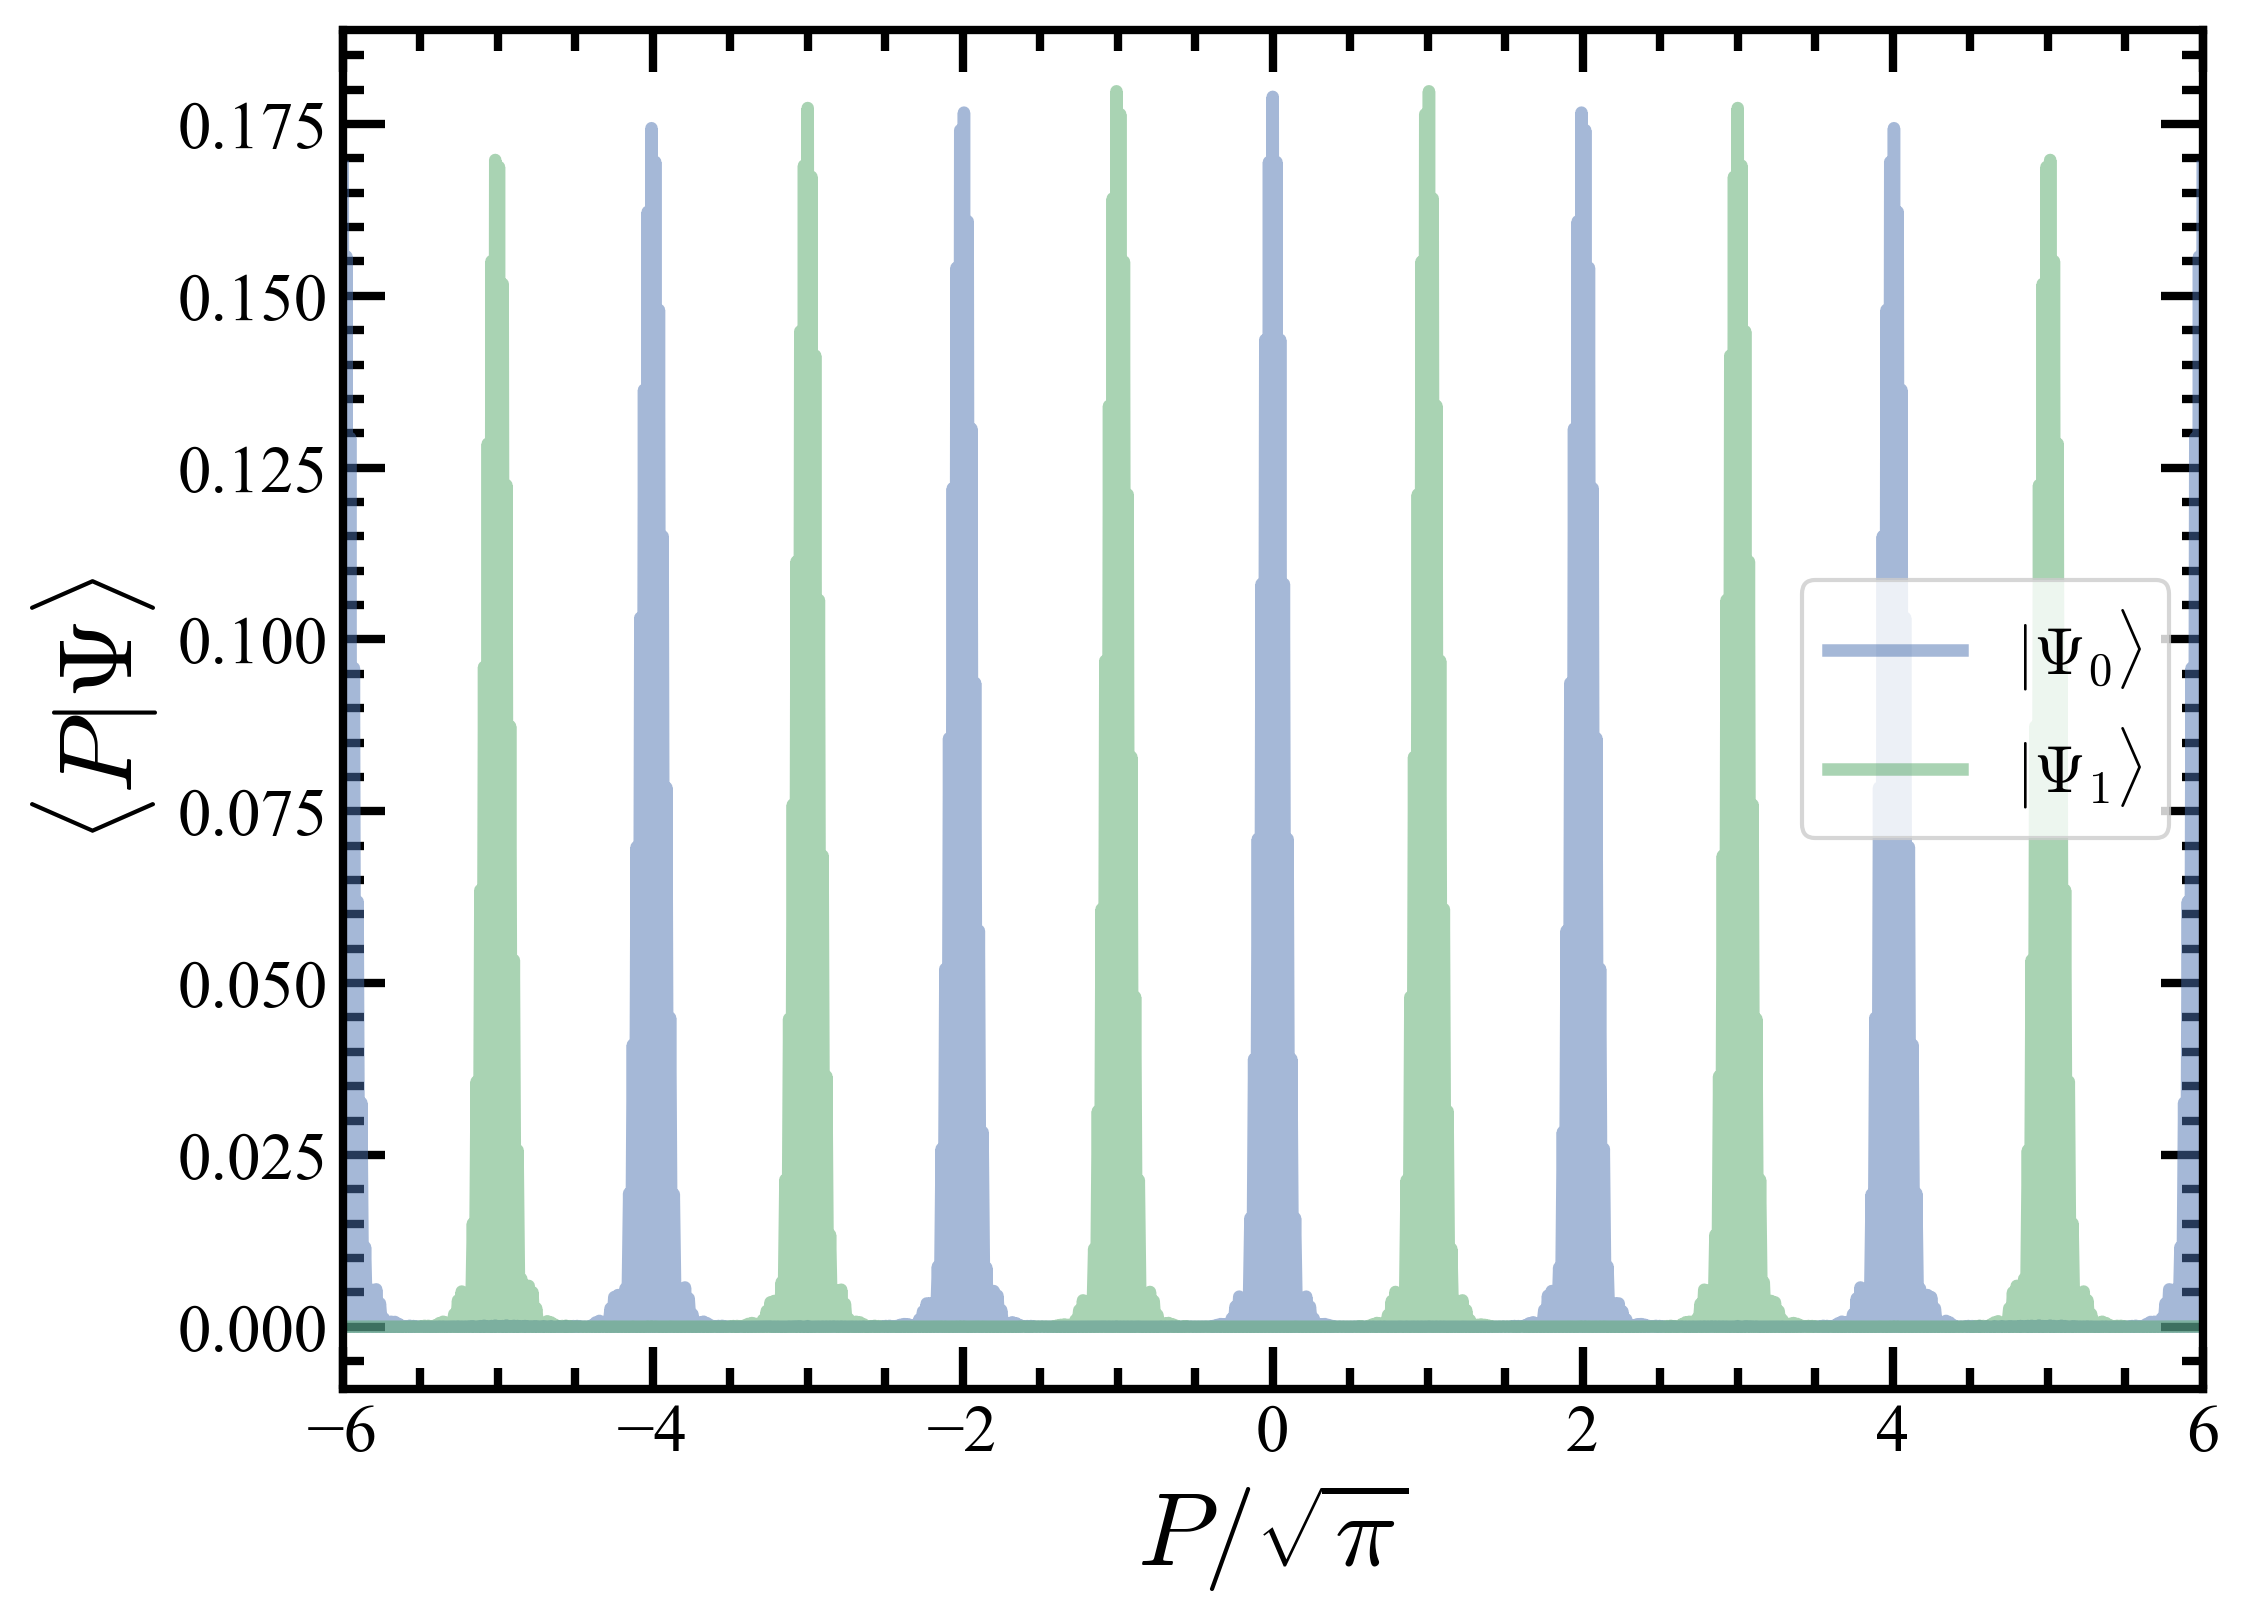

In [51]:
plt.figure(figsize = [8,6])
plt.plot(ppts/np.sqrt(np.pi), abs(np.real(states_GKP_P[0])), alpha = 0.5, label = r'$|\Psi_0\rangle$')
plt.plot(ppts/np.sqrt(np.pi), abs(np.real(states_GKP_P[1])), color = 'C1', alpha = 0.5, label = r'$|\Psi_1\rangle$')
plt.xlabel(r'$P/\sqrt{\pi}$')
plt.ylabel(r'$\langle P | \Psi \rangle$')
plt.xlim([ppts[0]/np.sqrt(np.pi),ppts[-1]/np.sqrt(np.pi)])
plt.legend()

### X basis

In [52]:
Nx = 1000
xpts = np.linspace(-6,6,Nx+1)*np.sqrt(np.pi)
x=np.diag(xpts)
op_x = Qobj(2*np.sqrt(np.pi)*x)
dx = xpts[-1]-xpts[-2]
dx_coeff = -1.0j/(2.0*dx)
p = dx_coeff*(np.diag(np.ones(Nx), 1) - np.diag(np.ones(Nx), -1))
op_p = Qobj(2*np.sqrt(np.pi)*p)
def LLL_hamiltonian(w,Vx,Vp):
    return w*(op_x**2 + op_p**2)/2 -Vx*op_x.cosm() - Vp*op_p.cosm()

In [53]:
w = 0.0
Vx = 1
Vp = 1
energies, states_GKP = LLL_hamiltonian(w,Vx,Vp).eigenstates()

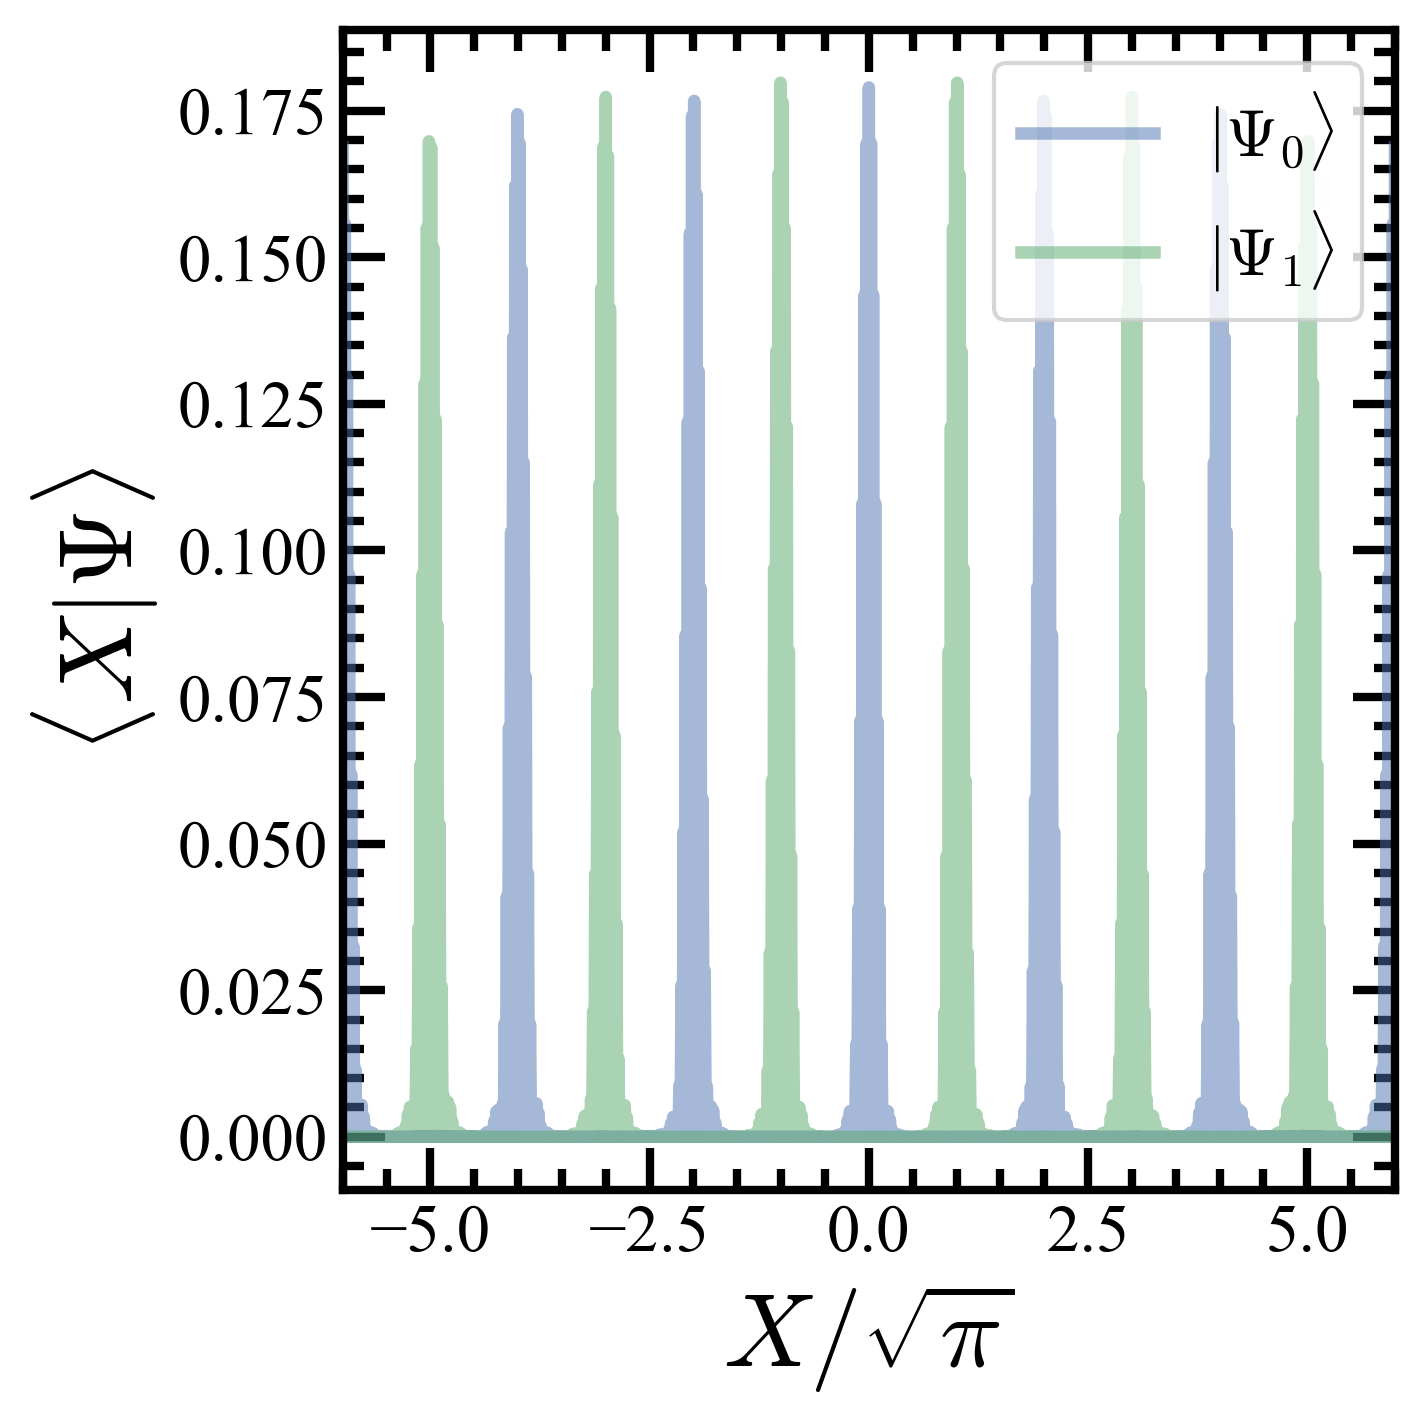

In [55]:
plt.figure(figsize = [5,5])
plt.plot(xpts/np.sqrt(np.pi), abs(np.real(states_GKP[0])), alpha = 0.5, label = r'$|\Psi_0\rangle$')
plt.plot(xpts/np.sqrt(np.pi), abs(np.real(states_GKP[1])), color = 'C1', alpha = 0.5, label = r'$|\Psi_1\rangle$')
plt.xlabel(r'$X/\sqrt{\pi}$')
plt.ylabel(r'$\langle X | \Psi \rangle$')
plt.xlim([xpts[0]/np.sqrt(np.pi),xpts[-1]/np.sqrt(np.pi)])
# plt.ylim([0,0.16])
plt.legend(loc=1)
plt.tight_layout()
if savefig == True:
    figname = 'GKP_ideal.pdf'
    plt.savefig(figpath+figname)

In [67]:
array1 = abs(np.real(states_GKP[0]))*100
array2 = abs(np.real(states_GKP_P[0]))*100
Z=np.zeros((len(xpts), len(ppts)))
for idx in range(len(ppts)):
    Z[:,idx] = array1[:,0]*array2[idx]
X,Y = np.meshgrid(xpts,ppts)
Z=Z.transpose()

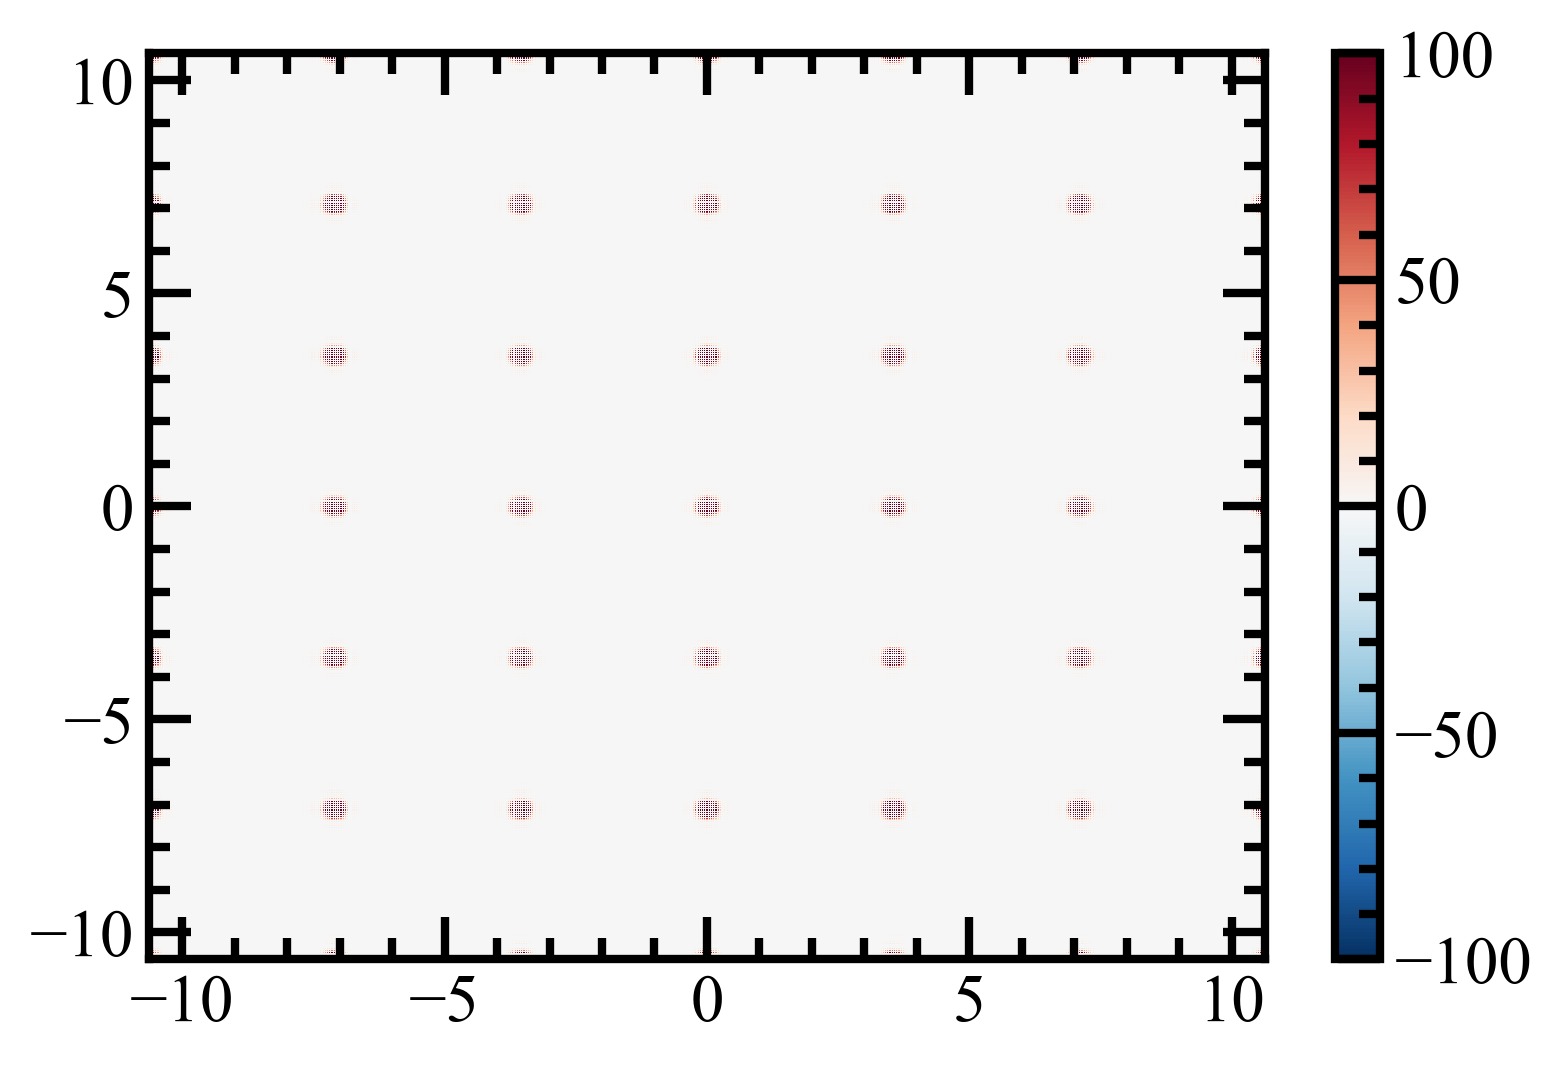

In [69]:
plt.pcolor(X,Y,Z, vmax = 100, vmin =-100, cmap = 'RdBu_r')
plt.colorbar()

## Approximate code space
$$
H = \frac{\omega}{2}(X^2+P^2)-(V_X\cos(2\sqrt{\pi}X) + V_P\cos(2\sqrt{\pi}P)
$$
Let $V_X=V_P=1=1000\omega$

In [9]:
w = 0.001
Vx = 1
Vp = 1
energies, states_approx1 = LLL_hamiltonian(w,Vx,Vp).eigenstates()

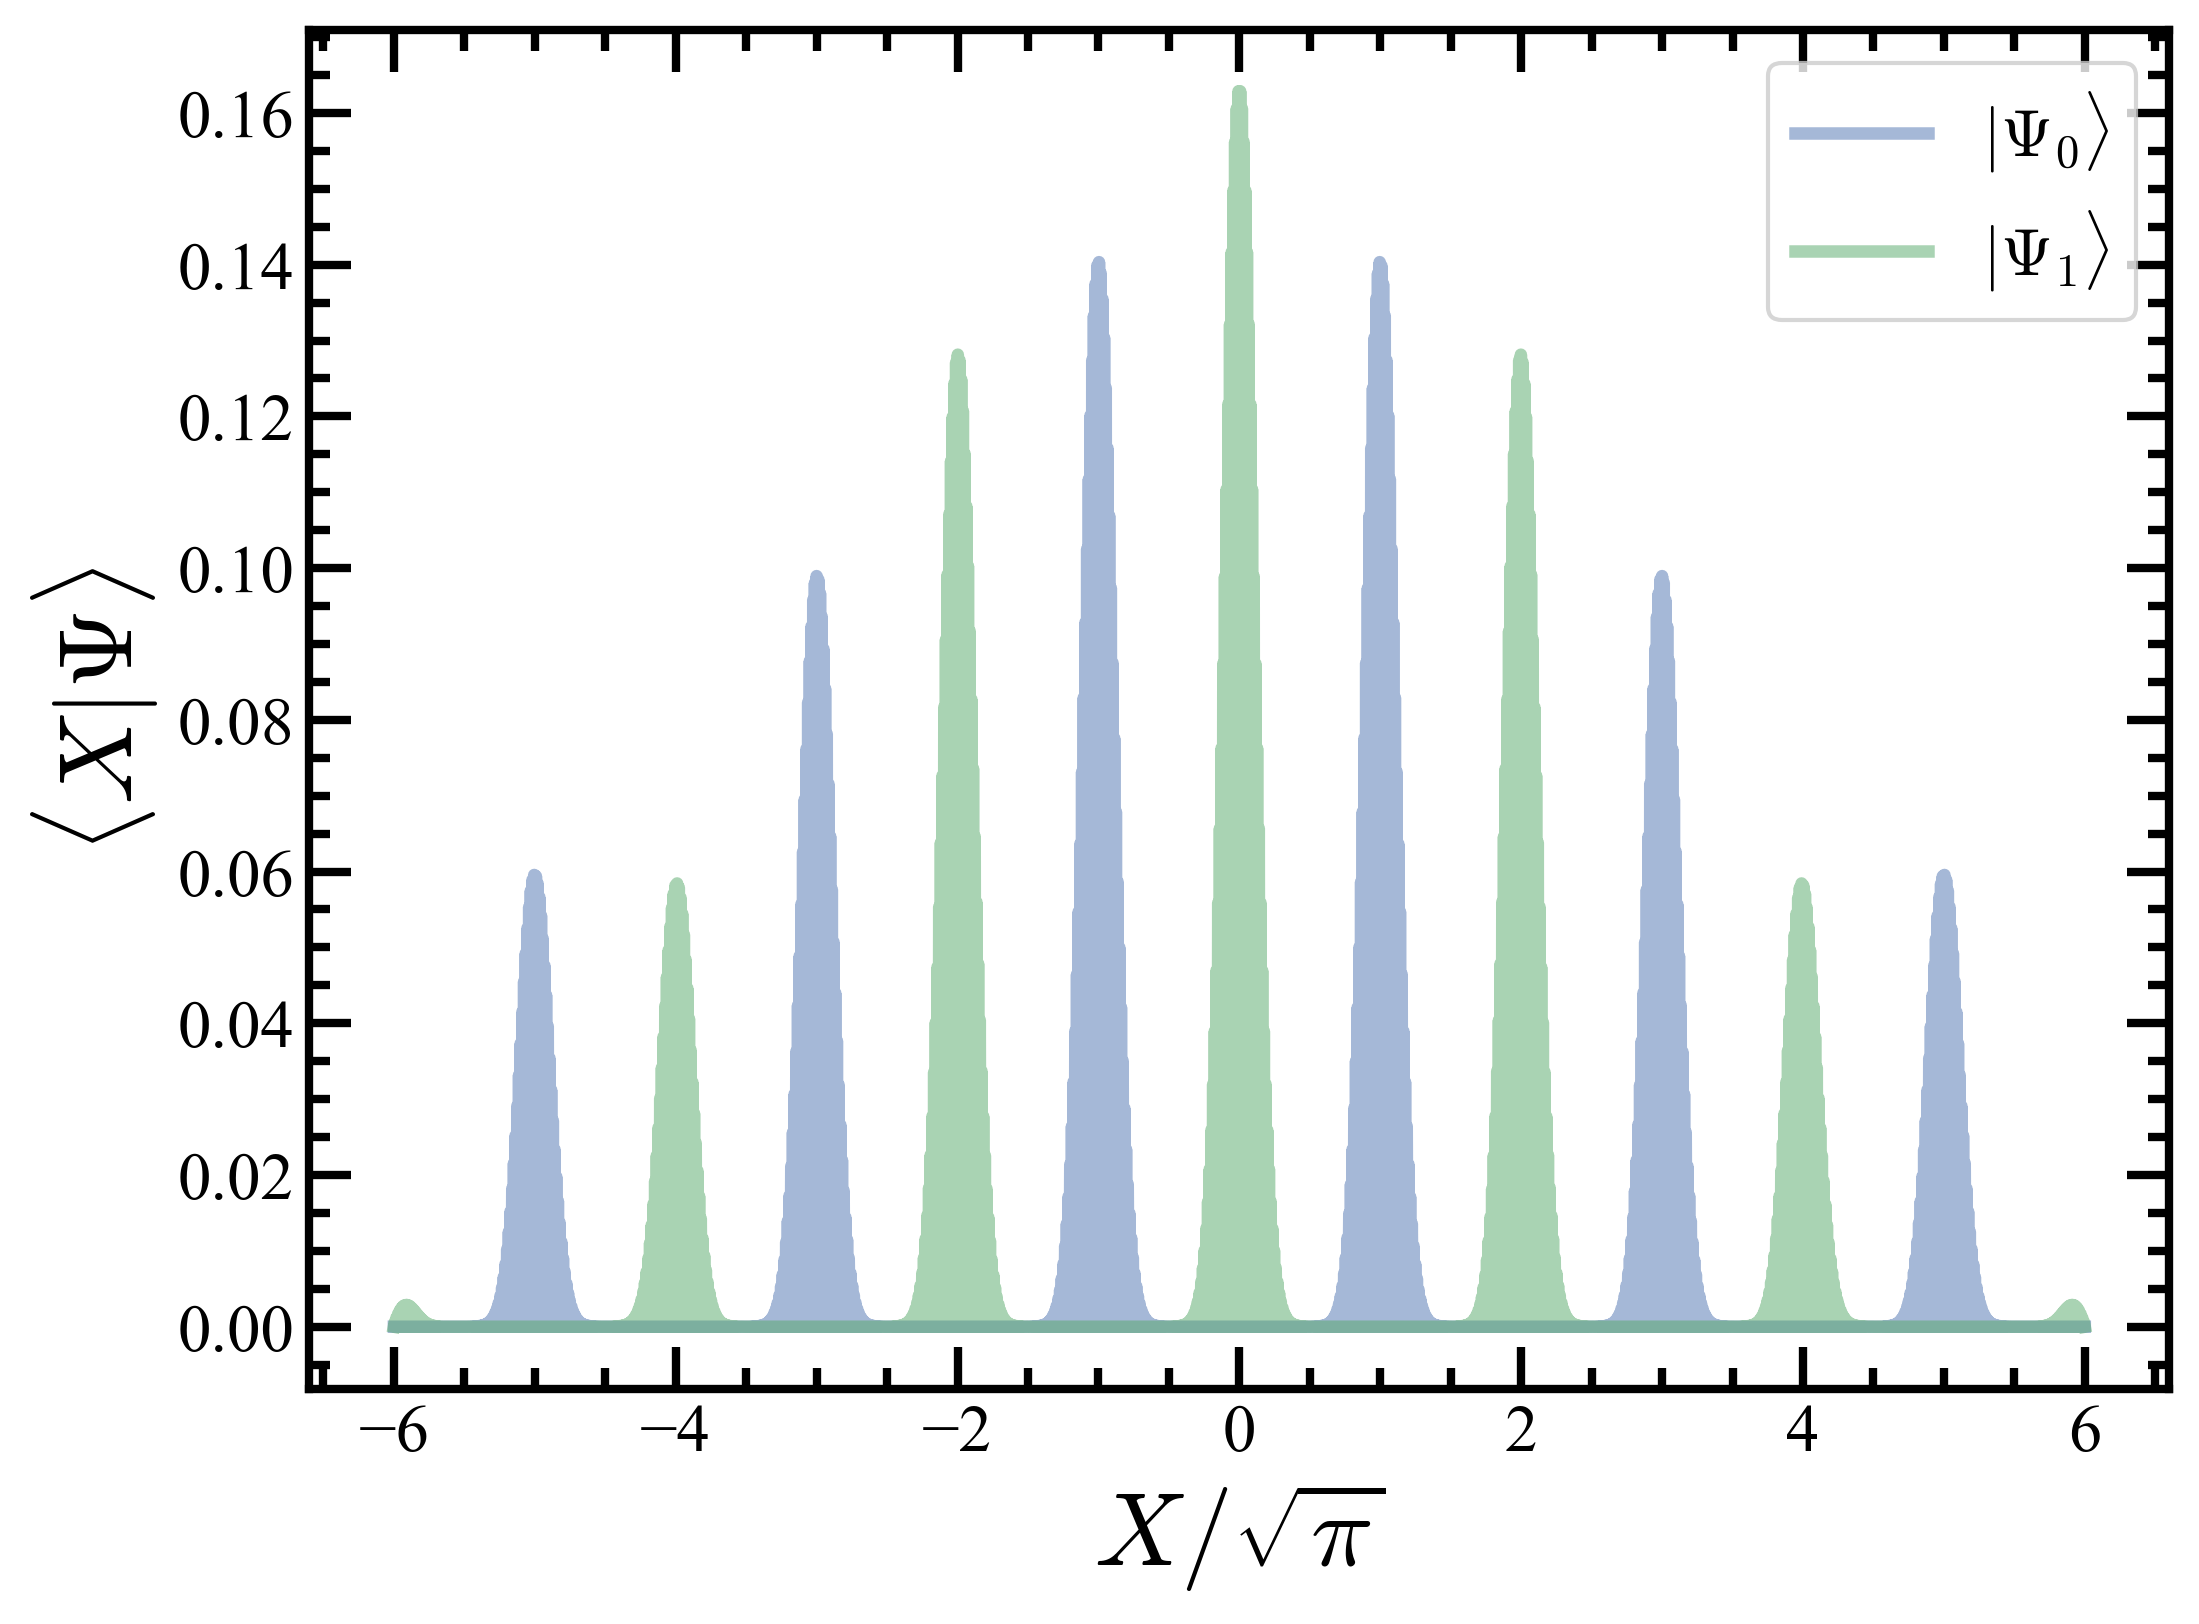

In [10]:
plt.figure(figsize = [8,6])
plt.plot(xpts/np.sqrt(np.pi), abs(np.real(states_approx1[0])), alpha = 0.5, label = r'$|\Psi_0\rangle$')
plt.plot(xpts/np.sqrt(np.pi), abs(np.real(states_approx1[2])), color = 'C1', alpha = 0.5, label = r'$|\Psi_1\rangle$')
plt.xlabel(r'$X/\sqrt{\pi}$')
plt.ylabel(r'$\langle X | \Psi \rangle$')
plt.legend()

Let $V_X=V_P=1=100\omega$

In [11]:
w = 0.01
Vx = 1
Vp = 1
energies, states_approx2 = LLL_hamiltonian(w,Vx,Vp).eigenstates()

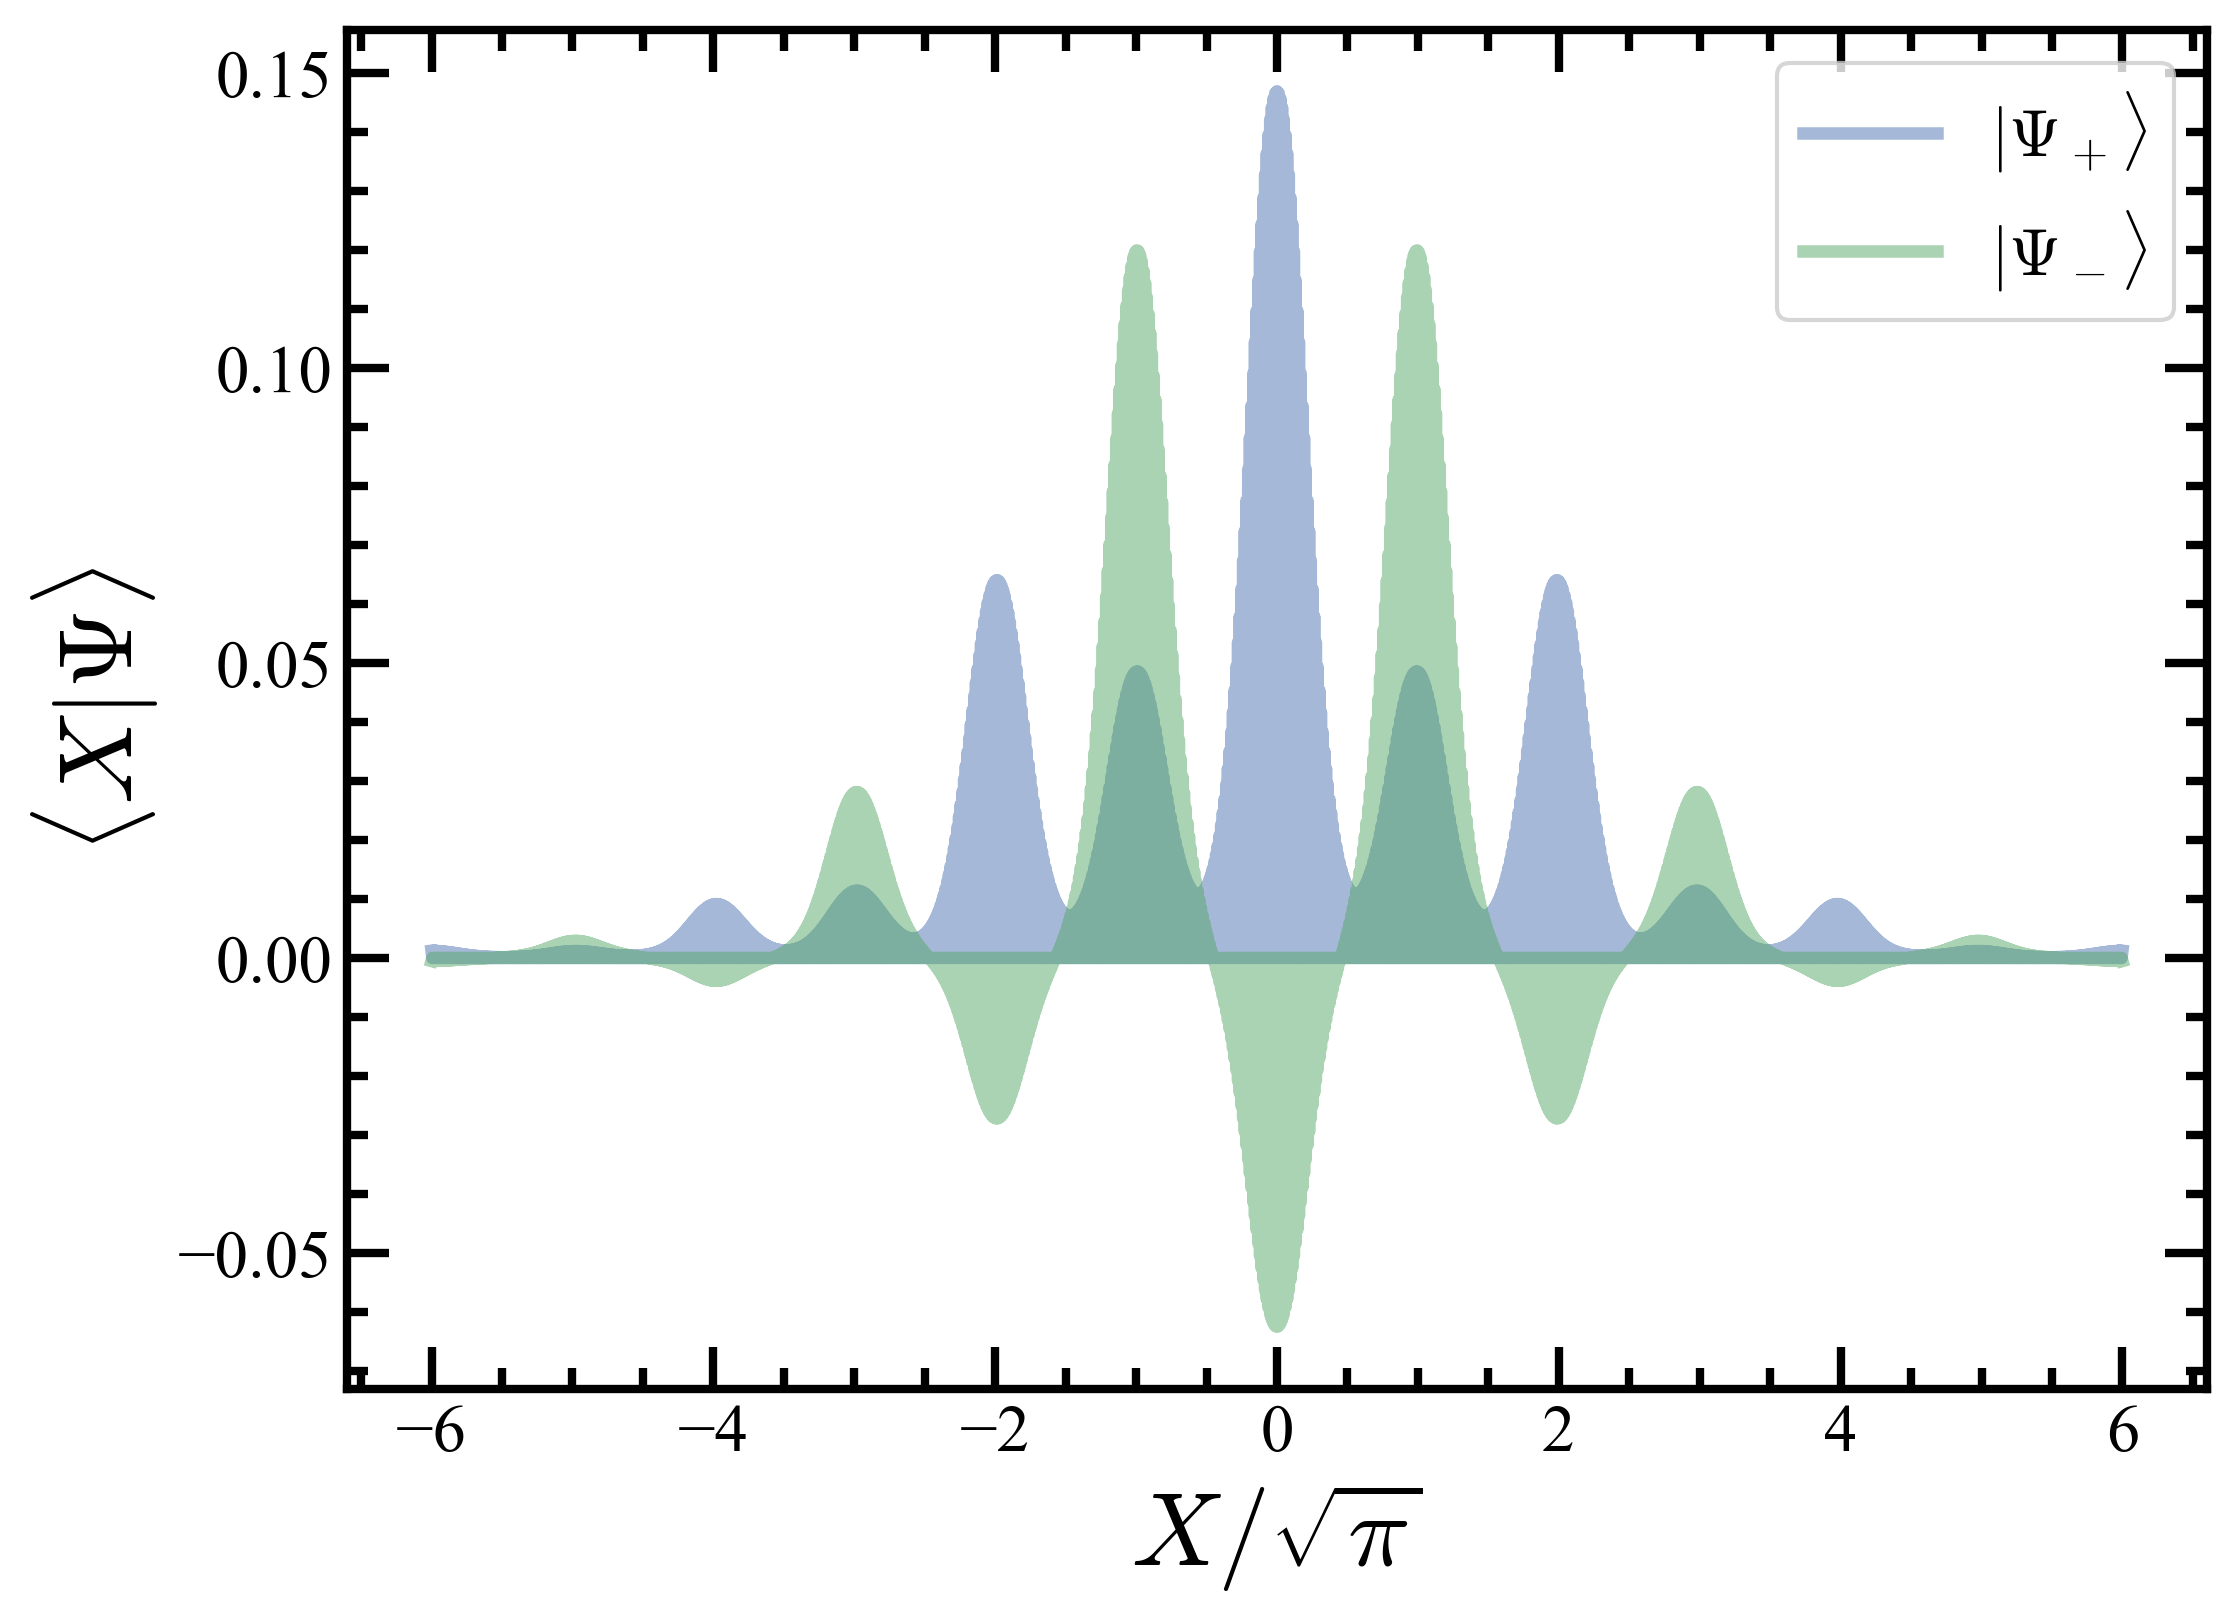

In [12]:
plt.figure(figsize = [8,6])
plt.plot(xpts/np.sqrt(np.pi), abs(np.real(states_approx2[0])), alpha = 0.5, label = r'$|\Psi_+\rangle$')
plt.plot(xpts/np.sqrt(np.pi), (np.real(states_approx2[2])), color = 'C1', alpha = 0.5, label = r'$|\Psi_-\rangle$')
plt.xlabel(r'$X/\sqrt{\pi}$')
plt.ylabel(r'$\langle X | \Psi \rangle$')
plt.legend()

According to Rymarz et al., the eigenstates are now superpositions of the grid states,
$$
\Psi_+ = \cos \frac{\pi}{8}\Psi_0 + \sin \frac{\pi}{8}\Psi_1
$$
$$
\Psi_- = -\sin \frac{\pi}{8}\Psi_0 + \cos \frac{\pi}{8}\Psi_1
$$
Therefore, we can try to recover the grid states by performing rotations on the eigenstates.

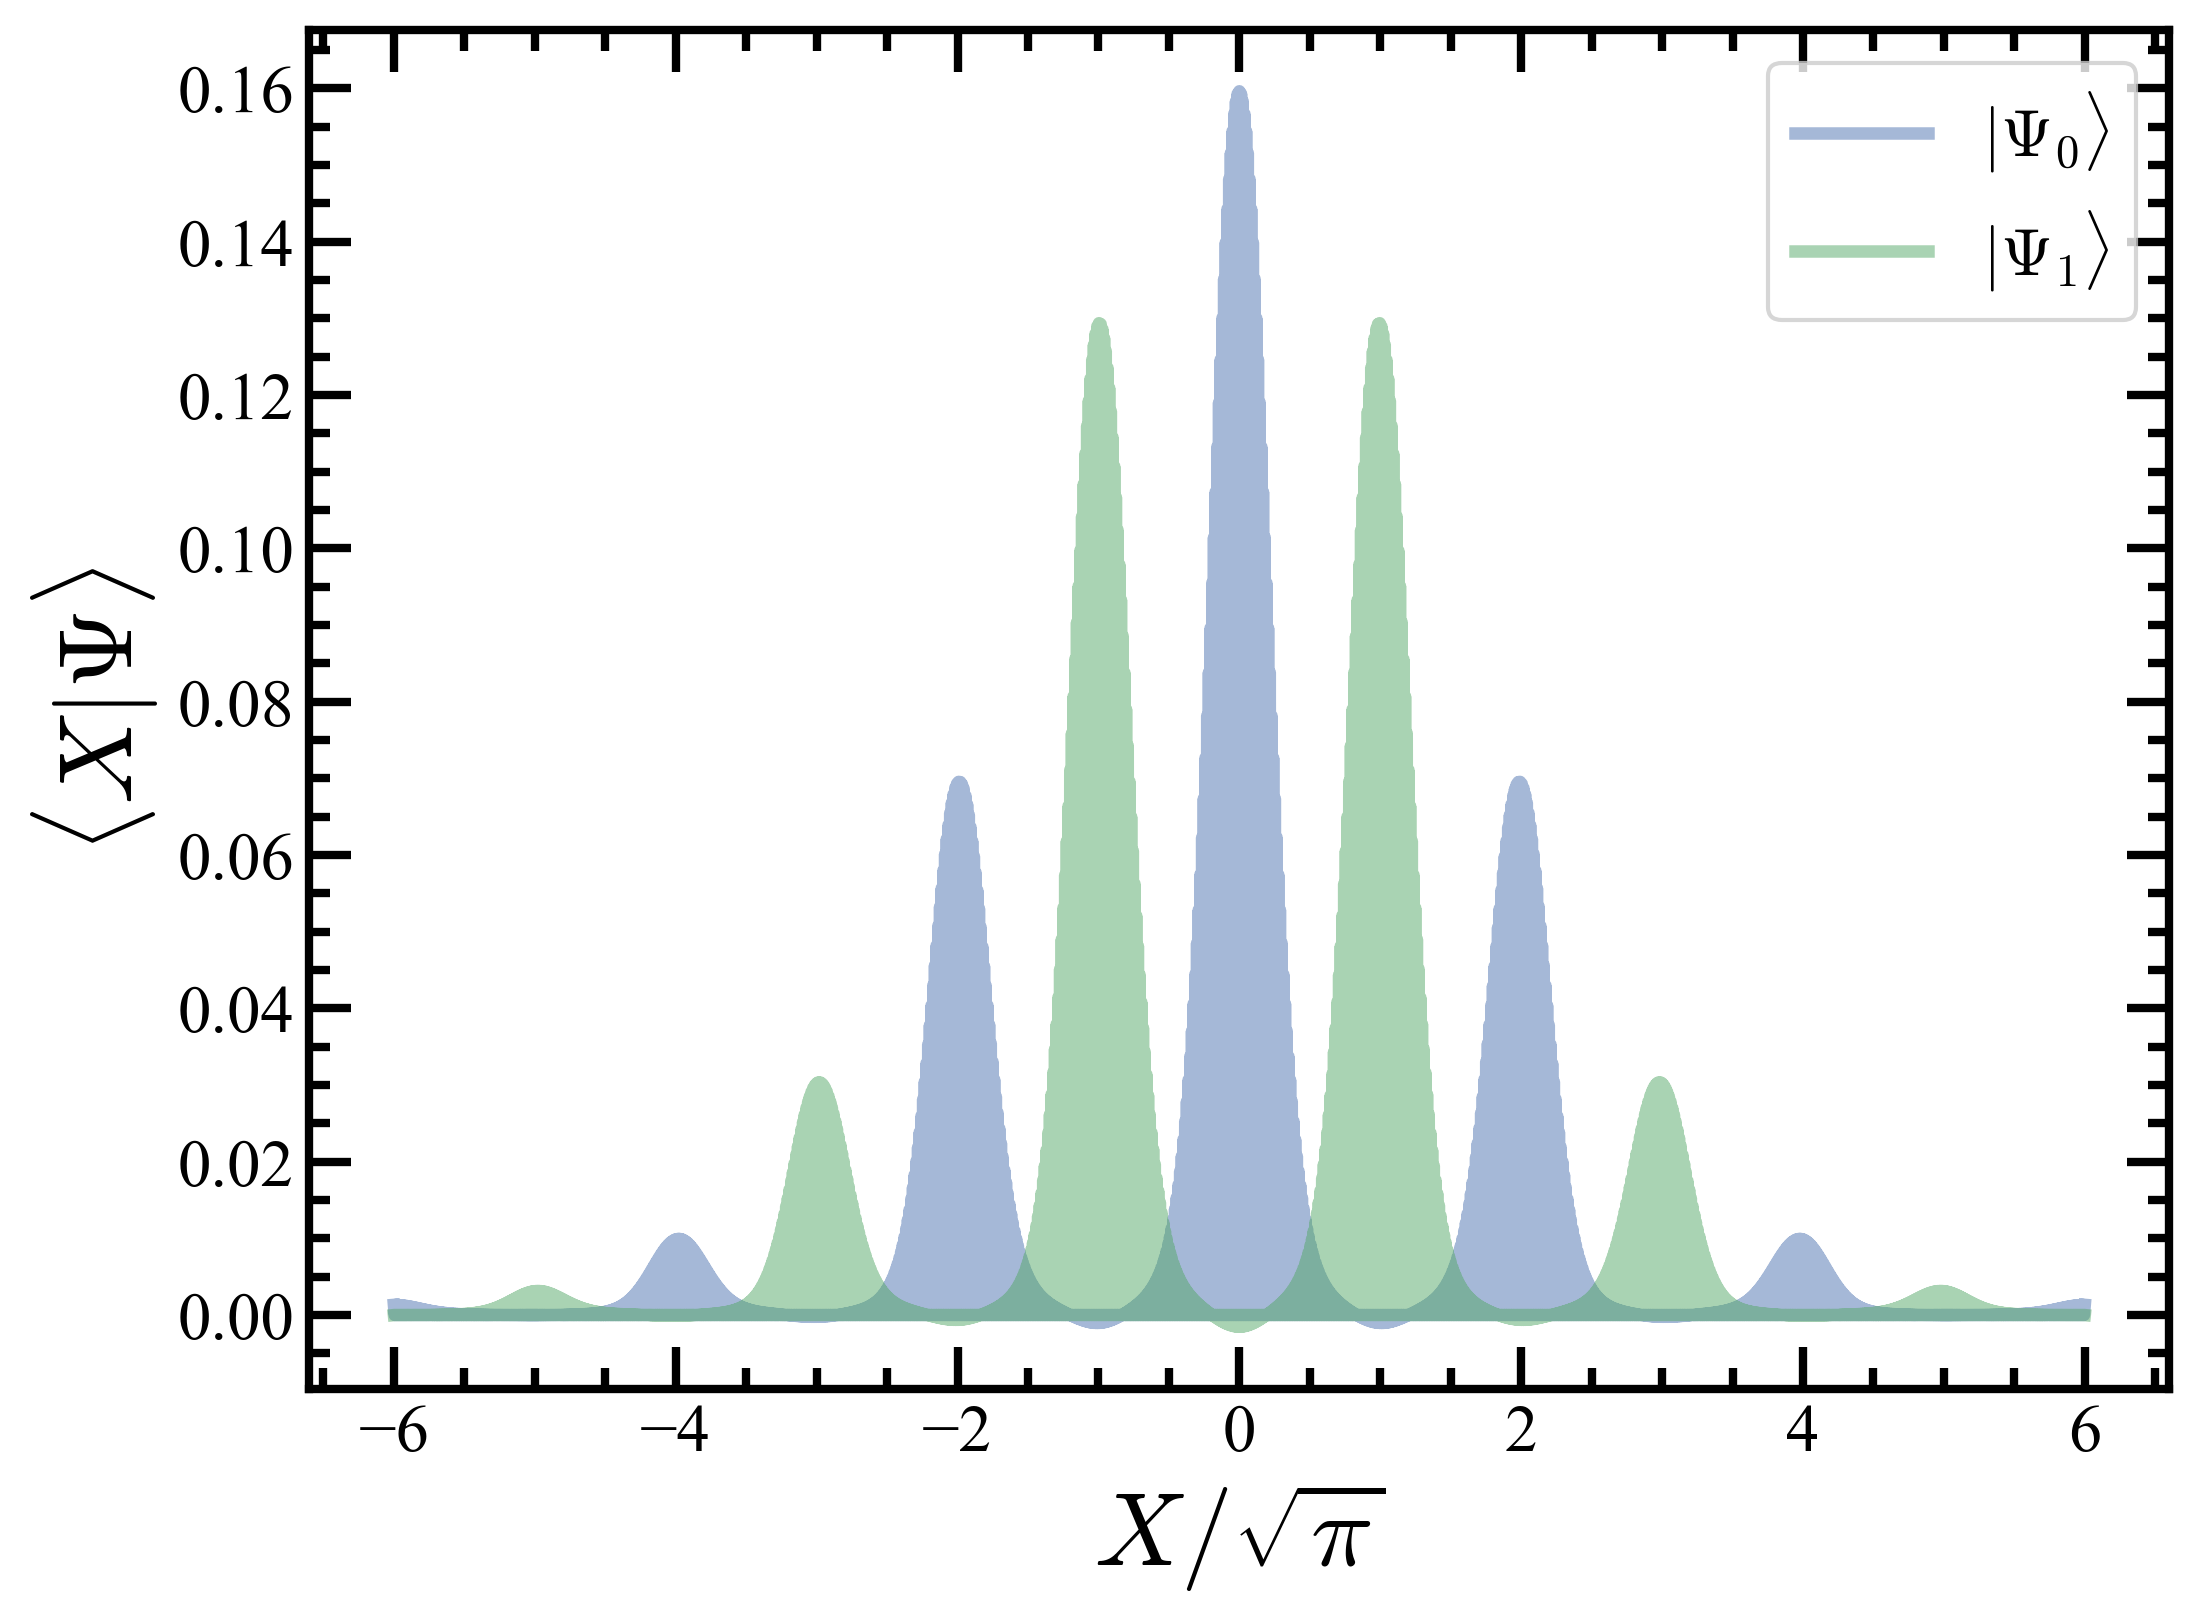

In [13]:
plt.figure(figsize = [8,6])
c = np.cos(np.pi/8)
s = np.sin(np.pi/8)
state1 = states_approx2[0]*s + states_approx2[2]*c
state0 = states_approx2[0]*c - states_approx2[2]*s
plt.plot(xpts/np.sqrt(np.pi), np.real(state0), alpha = 0.5, label = r'$|\Psi_0\rangle$')
plt.plot(xpts/np.sqrt(np.pi), np.real(state1), color = 'C1', alpha = 0.5, label = r'$|\Psi_1\rangle$')
plt.xlabel(r'$X/\sqrt{\pi}$')
plt.ylabel(r'$\langle X | \Psi \rangle$')
plt.legend()

In [14]:
x_me = op_x.matrix_element(states_approx2[0],states_approx2[2])
print("For eigenstate, the X matrix element is ", str(abs(x_me)))

x_me = op_x.matrix_element(state0,state1)
print("For grid states, the X matrix element is ", str(abs(x_me)))

For eigenstate, the X matrix element is  4.1244375400878094e-14
For grid states, the X matrix element is  3.958501339913057e-14


Let $V_X=V_P=1=10\omega$

In [15]:
w = 0.1
Vx = 1
Vp = 1
energies, states_approx3 = LLL_hamiltonian(w,Vx,Vp).eigenstates()

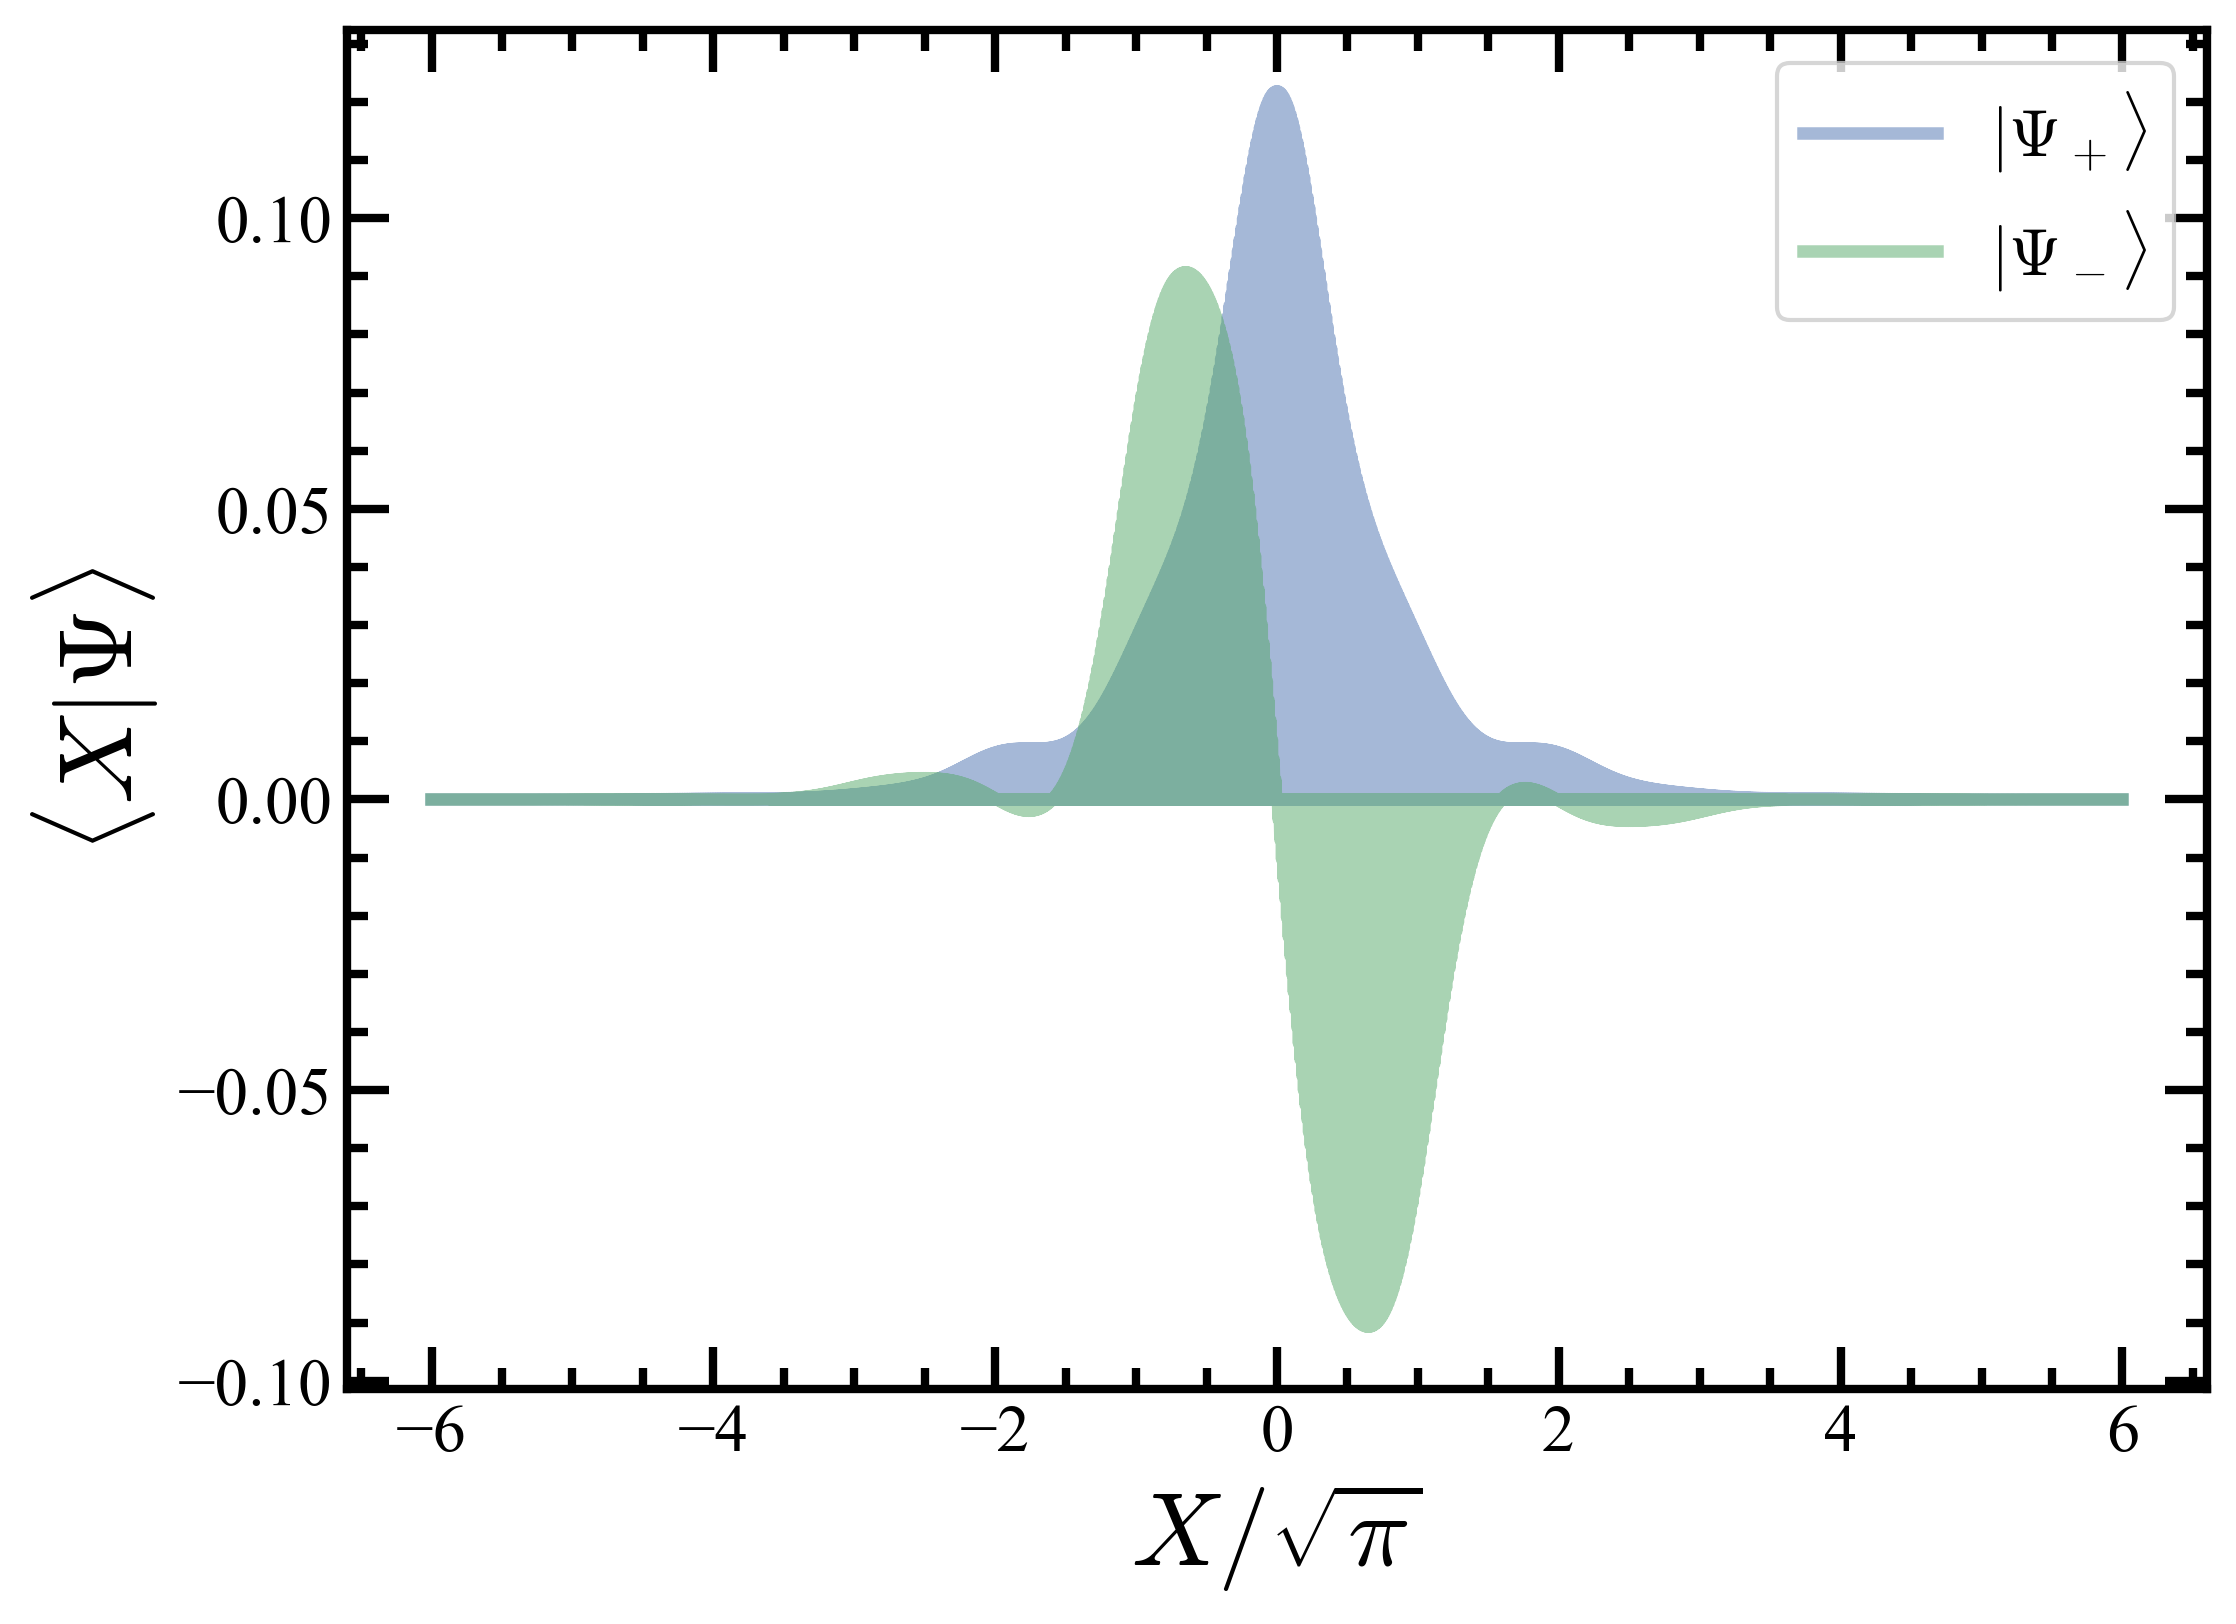

In [16]:
plt.figure(figsize = [8,6])
plt.plot(xpts/np.sqrt(np.pi), abs(np.real(states_approx3[0])), alpha = 0.5, label = r'$|\Psi_+\rangle$')
plt.plot(xpts/np.sqrt(np.pi), (np.real(states_approx3[2])), color = 'C1', alpha = 0.5, label = r'$|\Psi_-\rangle$')
plt.xlabel(r'$X/\sqrt{\pi}$')
plt.ylabel(r'$\langle X | \Psi \rangle$')
plt.legend()

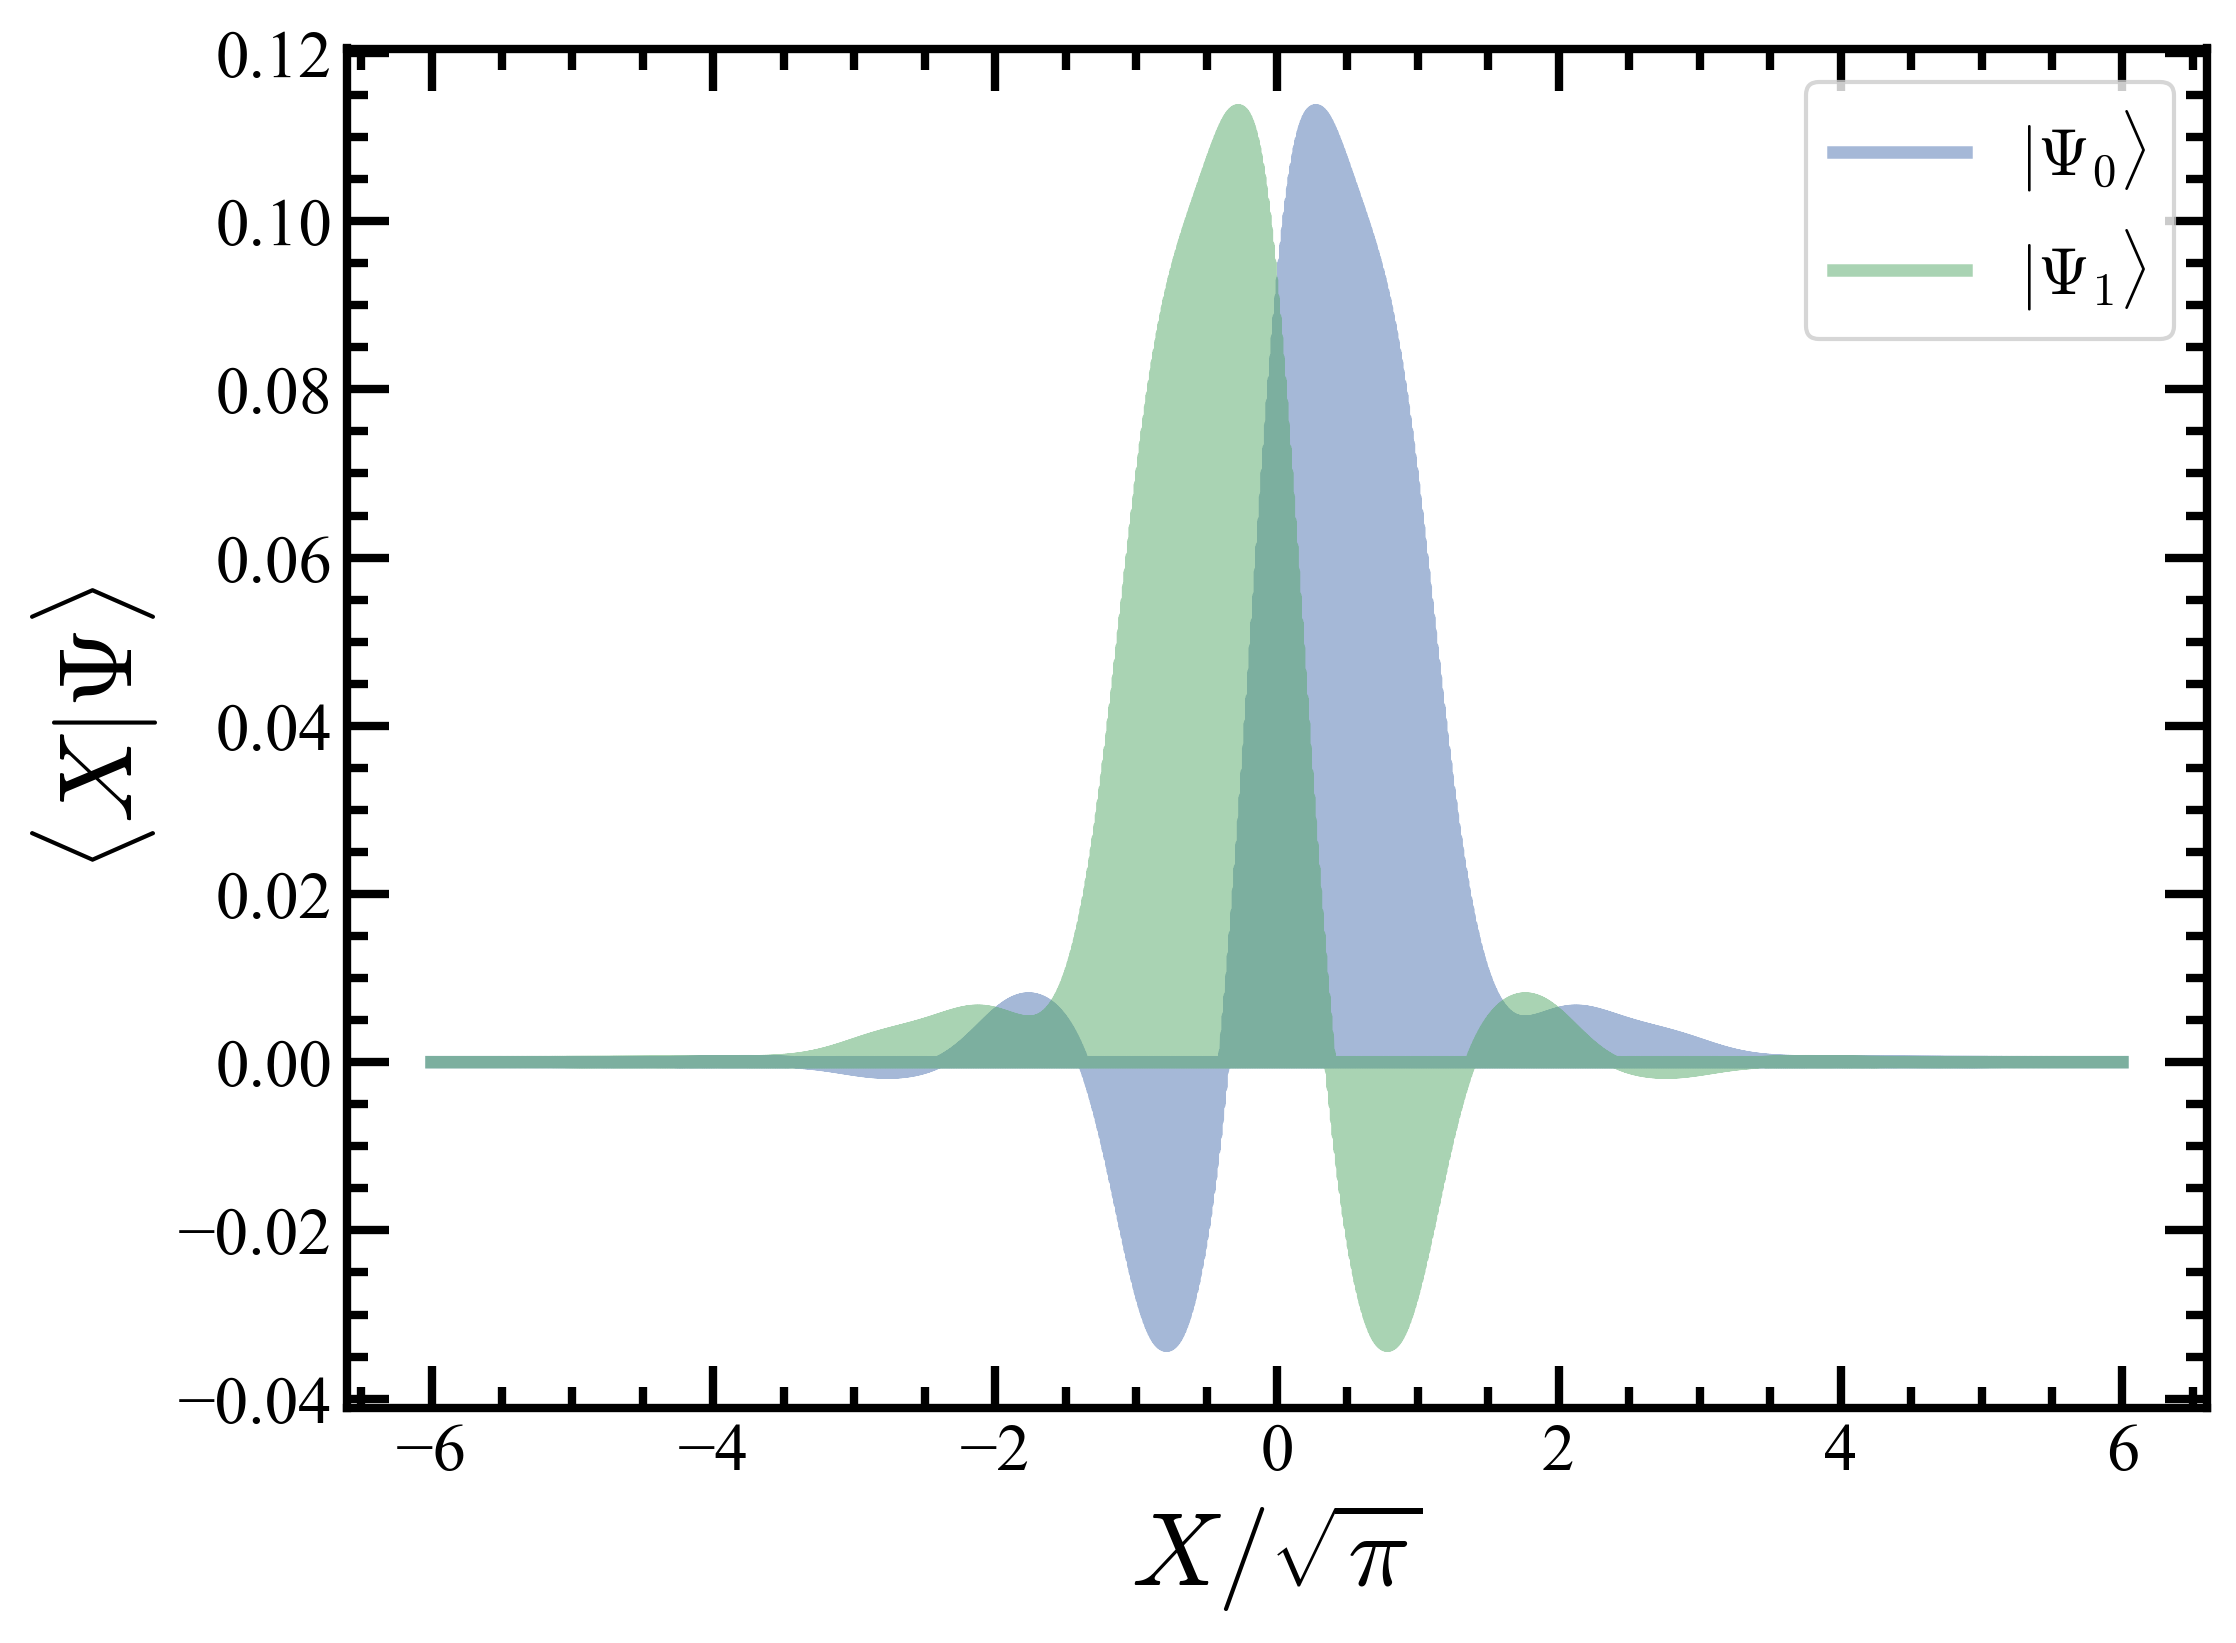

In [17]:
plt.figure(figsize = [8,6])
c = np.cos(np.pi/4)
s = np.sin(np.pi/4)
state1 = states_approx3[0]*s + states_approx3[2]*c
state0 = states_approx3[0]*c - states_approx3[2]*s
plt.plot(xpts/np.sqrt(np.pi), np.real(state0), alpha = 0.5, label = r'$|\Psi_0\rangle$')
plt.plot(xpts/np.sqrt(np.pi), np.real(state1), color = 'C1', alpha = 0.5, label = r'$|\Psi_1\rangle$')
plt.xlabel(r'$X/\sqrt{\pi}$')
plt.ylabel(r'$\langle X | \Psi \rangle$')
plt.legend()

In [18]:
x_me = op_x.matrix_element(states_approx3[0],states_approx3[2])
print("For eigenstate, the X matrix element is ", str(abs(x_me)))

x_me = op_x.matrix_element(state0,state1)
print("For grid states, the X matrix element is ", str(abs(x_me)))

For eigenstate, the X matrix element is  2.447555129282132
For grid states, the X matrix element is  1.098787475615407e-11


In [19]:
w = 10
Vx = 1
Vp = 1
energies, states_approx4 = LLL_hamiltonian(w,Vx,Vp).eigenstates()

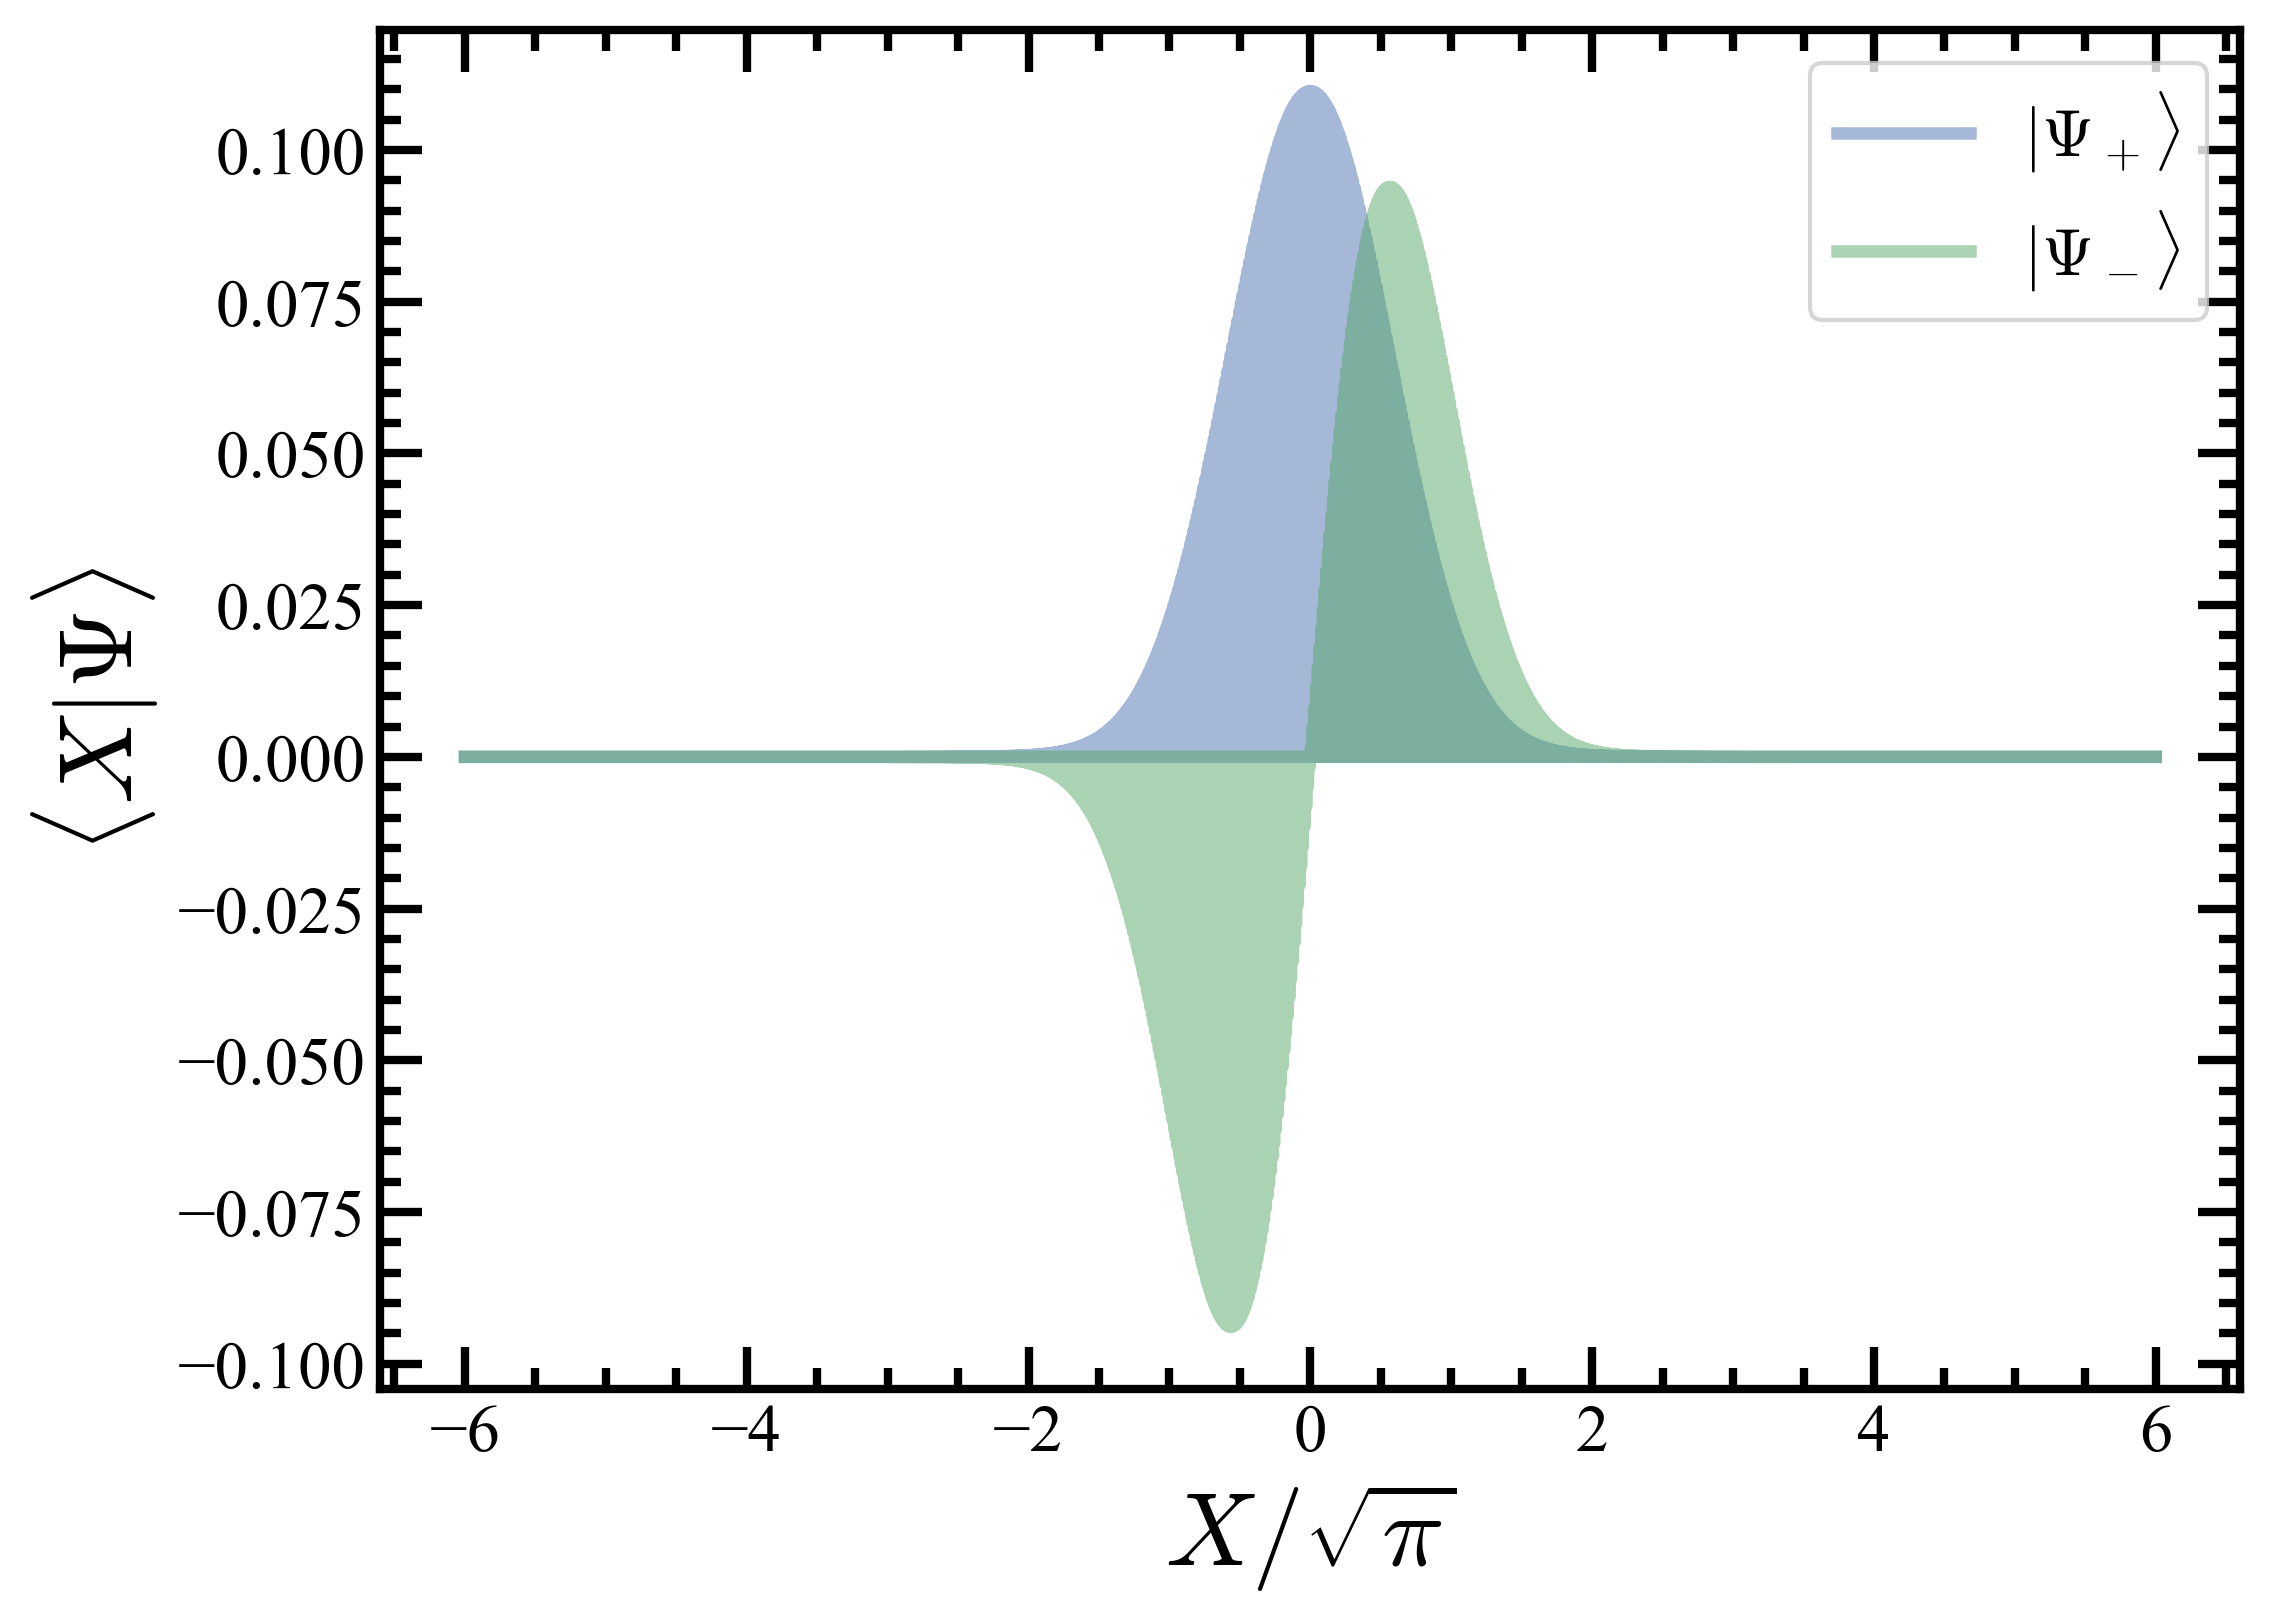

In [20]:
plt.figure(figsize = [8,6])
plt.plot(xpts/np.sqrt(np.pi), abs(np.real(states_approx4[0])), alpha = 0.5, label = r'$|\Psi_+\rangle$')
plt.plot(xpts/np.sqrt(np.pi), (np.real(states_approx4[2])), color = 'C1', alpha = 0.5, label = r'$|\Psi_-\rangle$')
plt.xlabel(r'$X/\sqrt{\pi}$')
plt.ylabel(r'$\langle X | \Psi \rangle$')
plt.legend()

In [70]:
w = 0.01
Vx = 2
Vp = 1
energies, states_approx4 = LLL_hamiltonian(w,Vx,Vp).eigenstates()
energies_P, states_approx_P4 = LLL_hamiltonian_P(w,Vx,Vp).eigenstates()

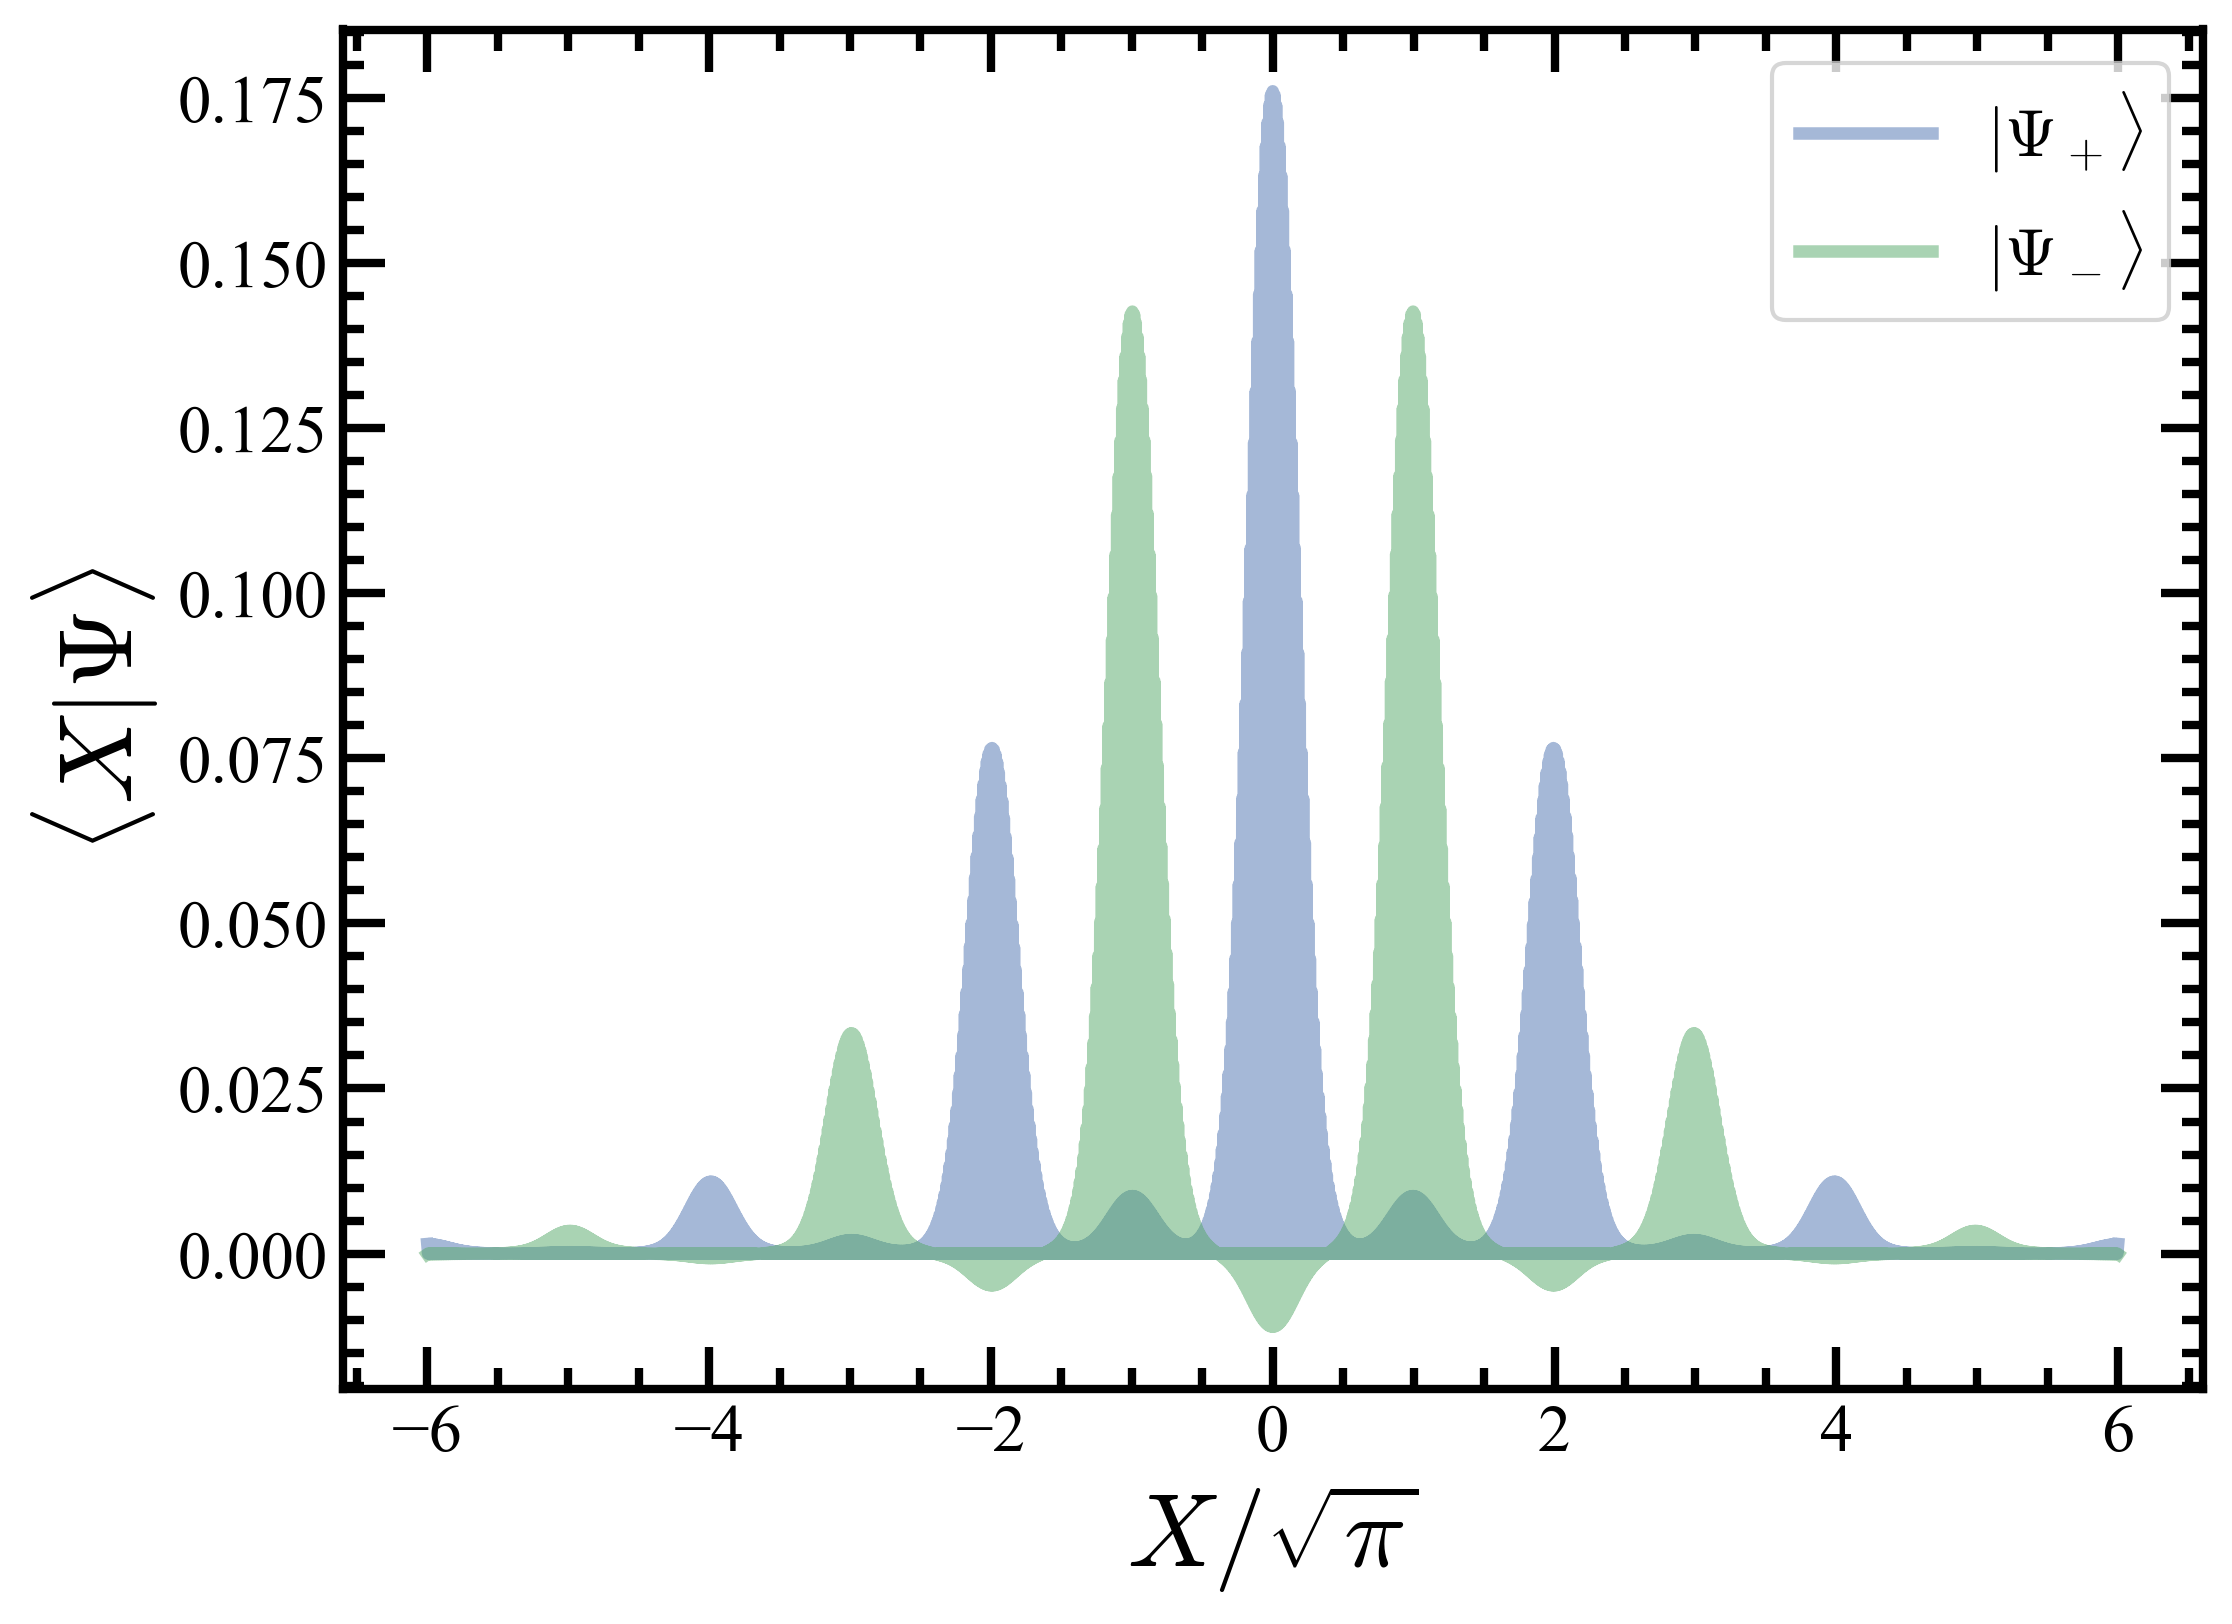

In [22]:
plt.figure(figsize = [8,6])
plt.plot(xpts/np.sqrt(np.pi), (np.real(states_approx4[0])), alpha = 0.5, label = r'$|\Psi_+\rangle$')
plt.plot(xpts/np.sqrt(np.pi), (np.real(states_approx4[2])), color = 'C1', alpha = 0.5, label = r'$|\Psi_-\rangle$')
plt.xlabel(r'$X/\sqrt{\pi}$')
plt.ylabel(r'$\langle X | \Psi \rangle$')
plt.legend()

In [79]:
array1 = abs(np.real(states_approx4[0]))*100
array2 = abs(np.real(states_approx_P4[0]))*100
Z=np.zeros((len(xpts), len(ppts)))
for idx in range(len(ppts)):
    Z[:,idx] = array1[:,0]*array2[idx]
Z0=Z.transpose()

array1 = abs(np.real(states_approx4[2]))*100
array2 = abs(np.real(states_approx_P4[2]))*100
Z=np.zeros((len(xpts), len(ppts)))
for idx in range(len(ppts)):
    Z[:,idx] = array1[:,0]*array2[idx]
X,Y = np.meshgrid(xpts/np.sqrt(np.pi),ppts/np.sqrt(np.pi))
Z1=Z.transpose()

Text(0.5, 0, '$X/\\sqrt{\\pi}$')

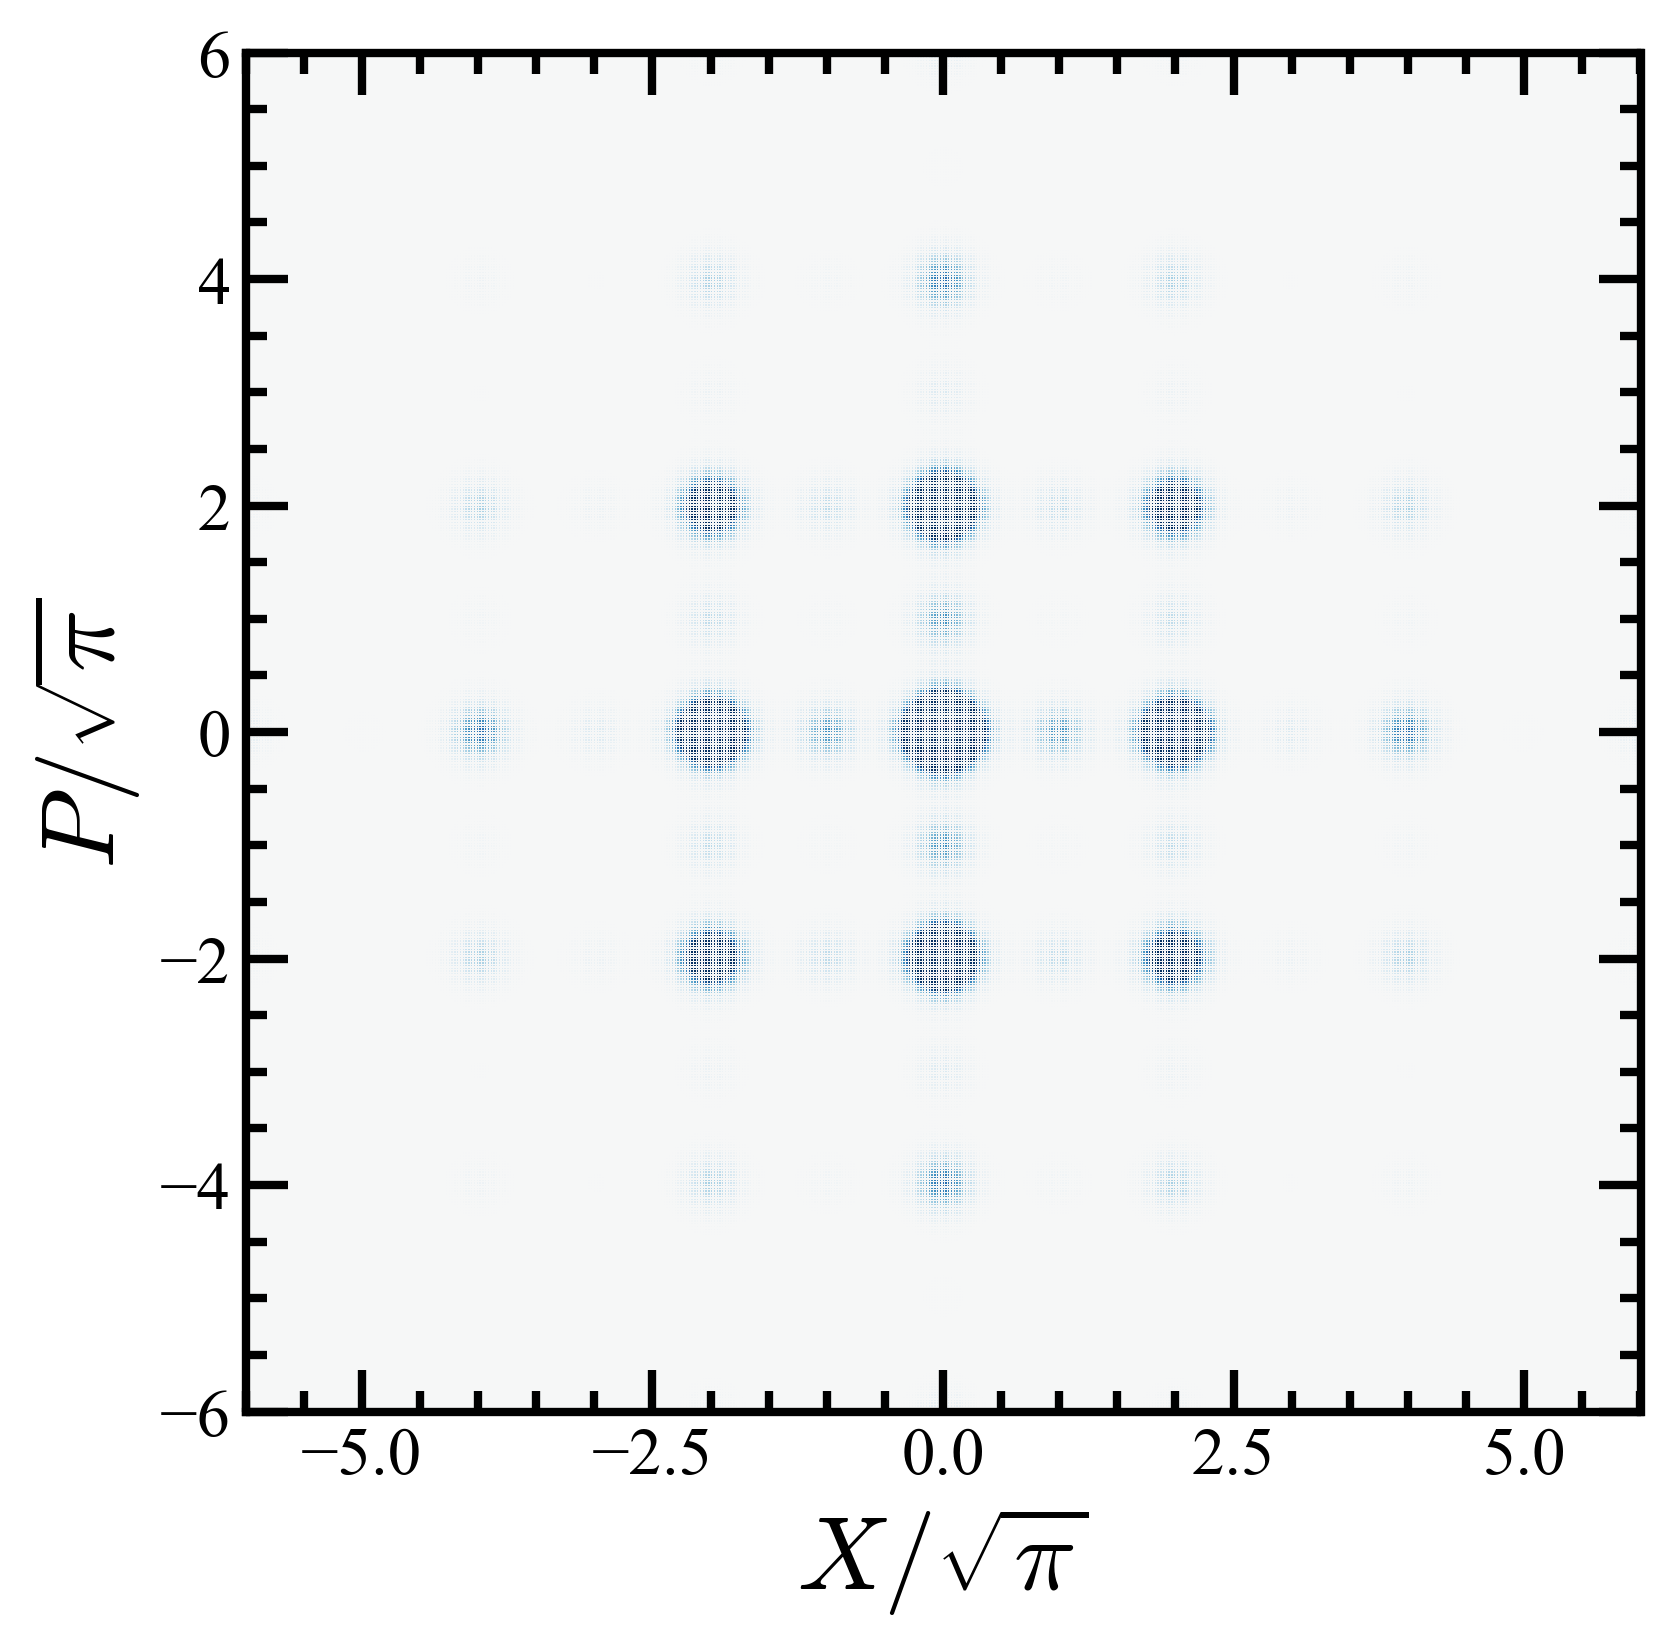

In [82]:
plt.figure(figsize = [6,6])
plt.pcolor(X,Y,Z0, vmax = 50, vmin =-50, cmap = 'RdBu')
# plt.pcolor(X,Y,Z1, vmax = 50, vmin =-50, cmap = 'RdBu')
plt.ylabel(r'$P/\sqrt{\pi}$')
plt.xlabel(r'$X/\sqrt{\pi}$')

Text(0.5, 0, '$X/\\sqrt{\\pi}$')

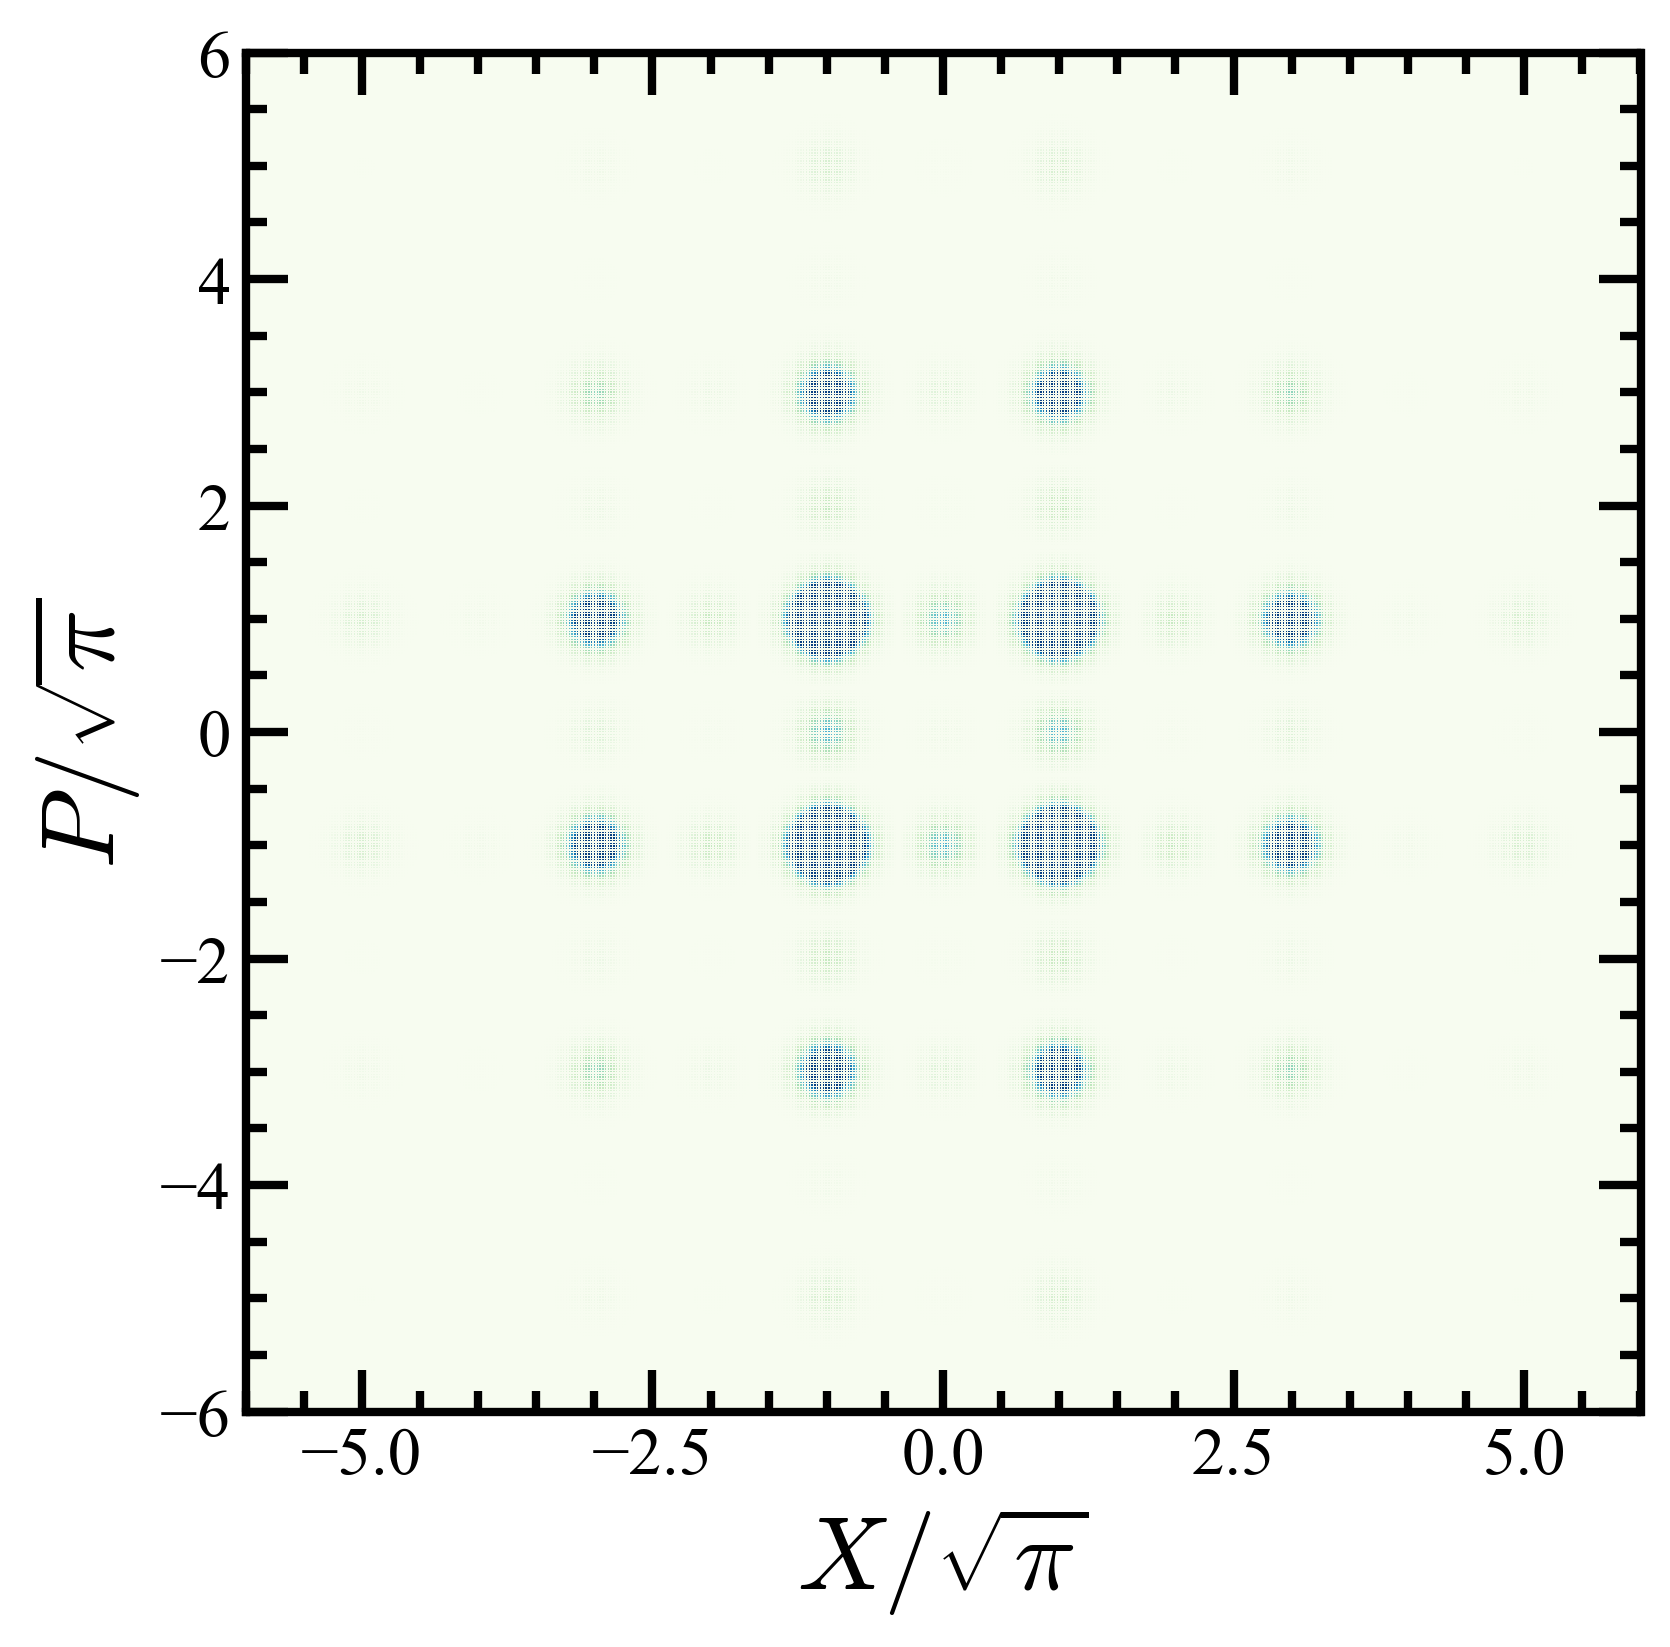

In [88]:
plt.figure(figsize = [6,6])
plt.pcolor(X,Y,Z1, vmax = 50, vmin =0, cmap = 'GnBu')
plt.ylabel(r'$P/\sqrt{\pi}$')
plt.xlabel(r'$X/\sqrt{\pi}$')

In [23]:
w = 0.05
Vx = 2
Vp = 1
energies, states_approx5 = LLL_hamiltonian(w,Vx,Vp).eigenstates()

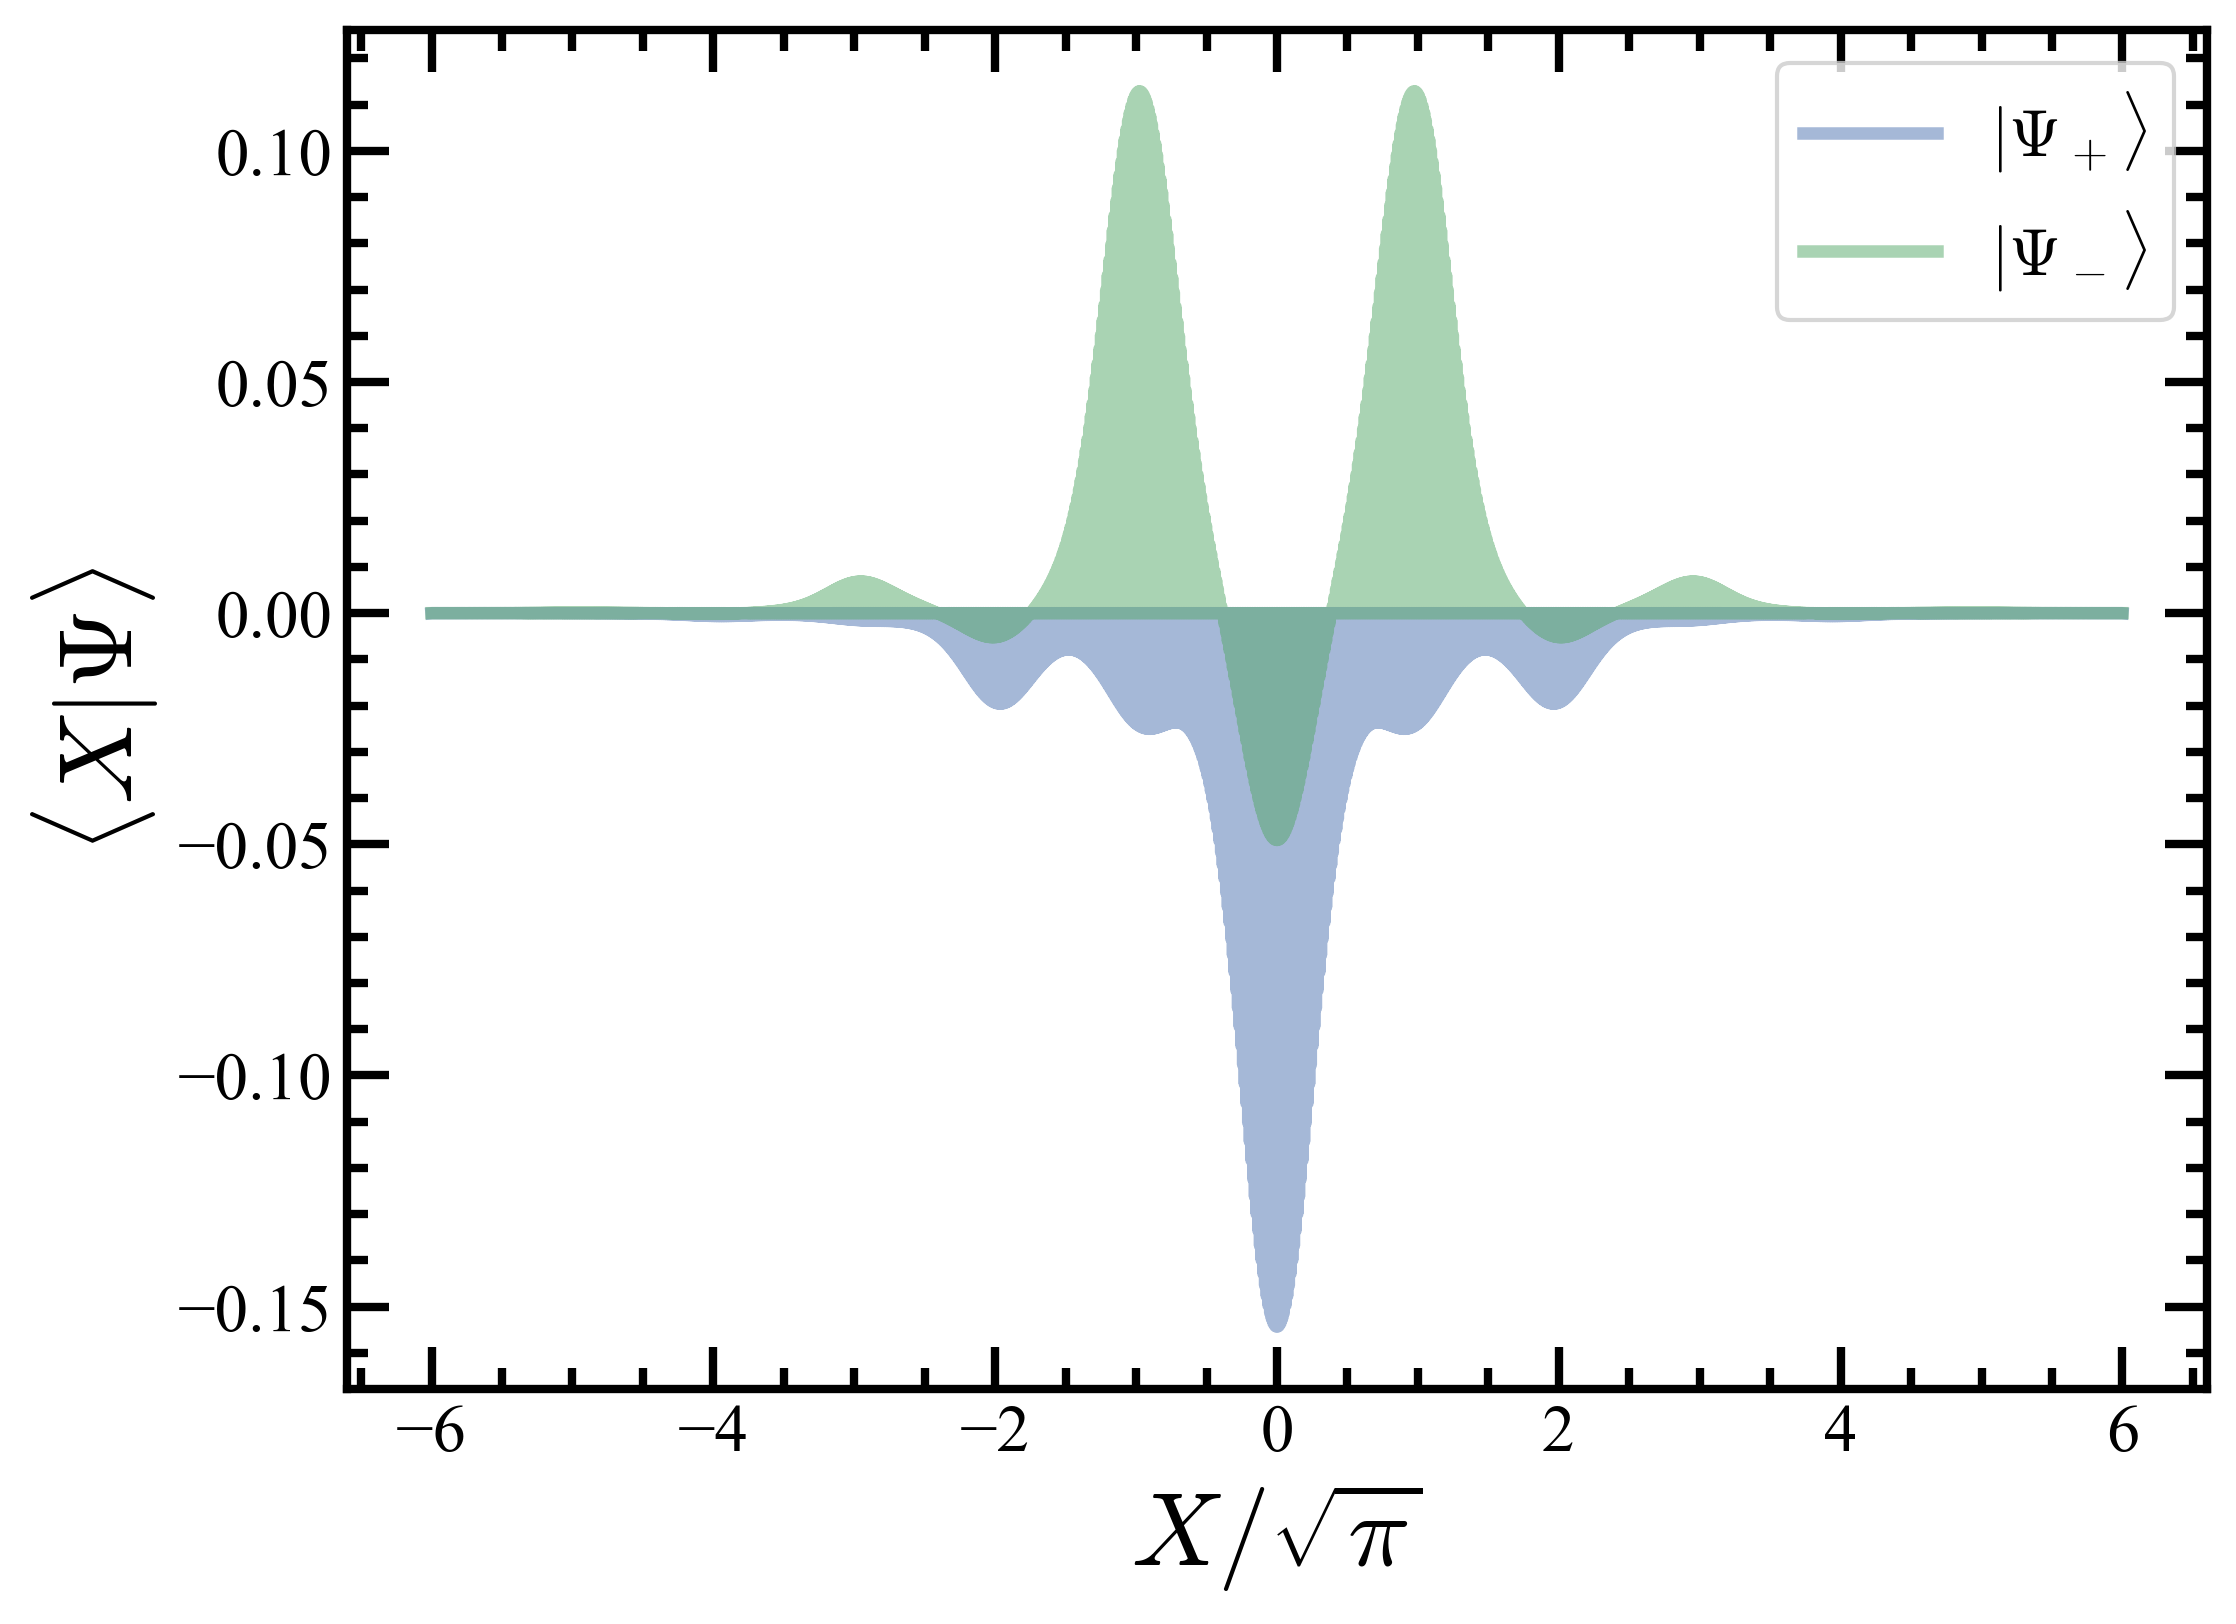

In [24]:
plt.figure(figsize = [8,6])
plt.plot(xpts/np.sqrt(np.pi), (np.real(states_approx5[0])), alpha = 0.5, label = r'$|\Psi_+\rangle$')
plt.plot(xpts/np.sqrt(np.pi), (np.real(states_approx5[2])), color = 'C1', alpha = 0.5, label = r'$|\Psi_-\rangle$')
plt.xlabel(r'$X/\sqrt{\pi}$')
plt.ylabel(r'$\langle X | \Psi \rangle$')
plt.legend()

## Superconducting circuit version
Now look at the Hamiltonian
$$
H = 4E_Cn^2 +\frac{1}{2}E_L\varphi^2 - E_{J2}\cos(2\varphi)-E_{J1}\cos(\varphi) - E_S\cos(2\pi n)
$$

In [89]:
# Just the cos(2*pi*n)
Nphi = 2000
phi_ext = 0.0
phi_pts = np.linspace(-4,4,Nphi+1)*np.pi
phi = np.diag(phi_pts)
op_phi = Qobj(phi)
op_cosp = Qobj(phi+phi_ext).cosm()
op_cos2p = Qobj(2*(phi+phi_ext)).cosm()
dphi = phi_pts[-1]-phi_pts[-2]
dphi_coeff = -1.0j/(2.0*dphi)
n = dphi_coeff*(np.diag(np.ones(Nphi), 1) - np.diag(np.ones(Nphi), -1))
op_n = Qobj(n)
op_cosn = Qobj(2*(np.pi)*n).cosm()

def ps_hamiltonian(E_L,E_S):
    return 0.5*E_L*op_phi**2 - E_S*op_cosn

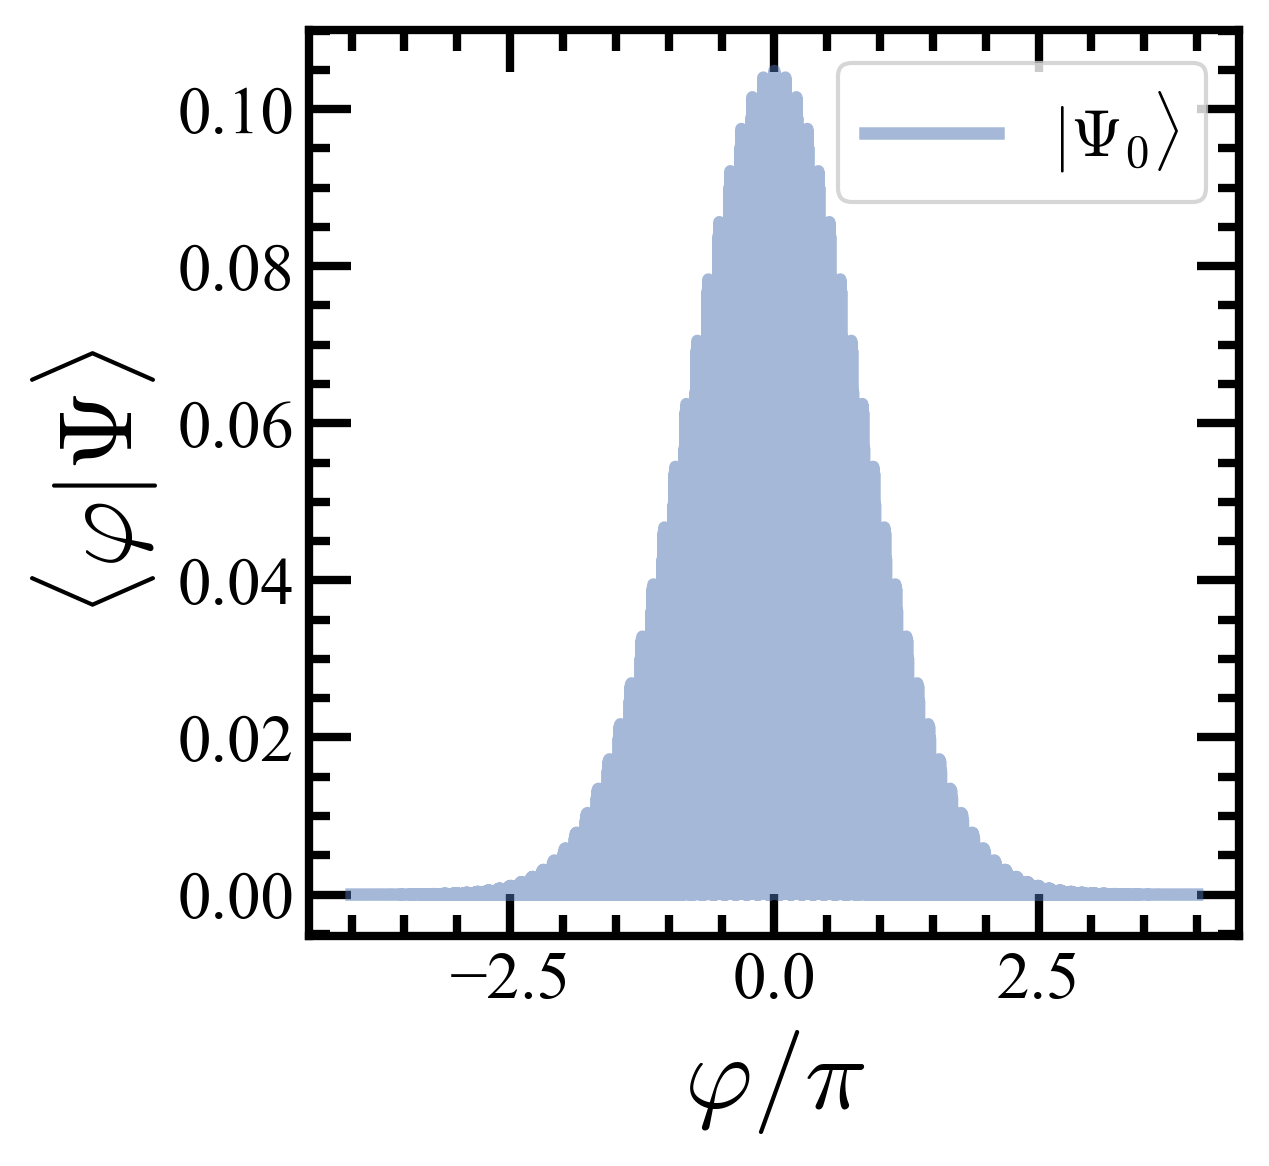

In [93]:
E_L = 0.05
E_S = 4
energies, states_ps = ps_hamiltonian(E_L,E_S).eigenstates()

plt.figure(figsize = [4,4])
plt.plot(phi_pts/np.pi, abs(np.real(states_ps[0])), alpha = 0.5, label = r'$|\Psi_0\rangle$')
# plt.plot(phi_pts/np.pi, abs(np.real(states_ps[1])), color = 'C1', alpha = 0.5, label = r'$|\Psi_1\rangle$')
# plt.plot(phi_pts/np.pi, abs(np.real(states_ps[2])), color = 'C2', alpha = 0.5, label = r'$|\Psi_2\rangle$')
# plt.plot(phi_pts/np.pi, abs(np.real(states_ps[3])), color = 'C4', alpha = 0.5, label = r'$|\Psi_3\rangle$')
plt.xlabel(r'$\varphi/\pi$')
plt.ylabel(r'$\langle \varphi | \Psi \rangle$')
plt.legend(loc=1)

In [27]:
# from scipy.sparse import diags
# Nphi=2000
# phi_pts = np.linspace(-5,5,Nphi)*np.pi
# phi = diags(phi_pts, 0, shape=(Nphi,Nphi), format='csr', dtype='complex128')
# cosphi = diags(np.cos(phi_pts), 0, shape=(Nphi,Nphi), format='csr', dtype='complex128')
# dphi = phi_pts[-1]-phi_pts[-2]
# dphi_coeff = -1.0j/(2*dphi)
# n = -1.j * diags([-dphi_coeff, dphi_coeff], [-1,1], shape=(Nphi,Nphi), format='csr', dtype='complex128')
# op_phi = Qobj(phi)
# op_n = Qobj(n)
# op_cosphi = Qobj(cosphi)
# op_cosn = Qobj(2*np.pi*n).cosm()
# def GKP_hamiltonian(E_C,E_L,E_J,E_S):
#     return 4*E_C*op_n**2 + 0.5*E_L*op_phi**2 - E_J*op_cosphi - E_S*op_cosn




In [6]:
Nphi = 2000
phi_ext = 0.0
phi_pts = np.linspace(-4,4,Nphi+1)*np.pi
phi = np.diag(phi_pts)
op_phi = Qobj(phi)
op_cosp = Qobj(phi+phi_ext).cosm()
op_cos2p = Qobj(2*(phi+phi_ext)).cosm()
dphi = phi_pts[-1]-phi_pts[-2]
dphi_coeff = -1.0j/(2.0*dphi)
n = dphi_coeff*(np.diag(np.ones(Nphi), 1) - np.diag(np.ones(Nphi), -1))
op_n = Qobj(n)
op_cosn = Qobj(2*(np.pi)*n).cosm()

def GKP_hamiltonian(E_C,E_L,E_J1,EJ2 ,E_S):
    return 4*E_C*op_n**2 + 0.5*E_L*op_phi**2 - E_J1*op_cosp - E_J2*op_cos2p - E_S*op_cosn

In [33]:
E_C = 0.2
E_J2 = 15
E_J1 = 0.5
E_L = 0.05
E_S = 4
energies, states_GKP = GKP_hamiltonian(E_C,E_L,E_J1,E_J2,E_S).eigenstates()

In [34]:
print (energies[1]-energies[0])
print (energies[2]-energies[0])
print (energies[3]-energies[0])
print (energies[4]-energies[0])

0.5655828970269727
0.9038462044050792
1.5381796472879135
2.1361825974398077


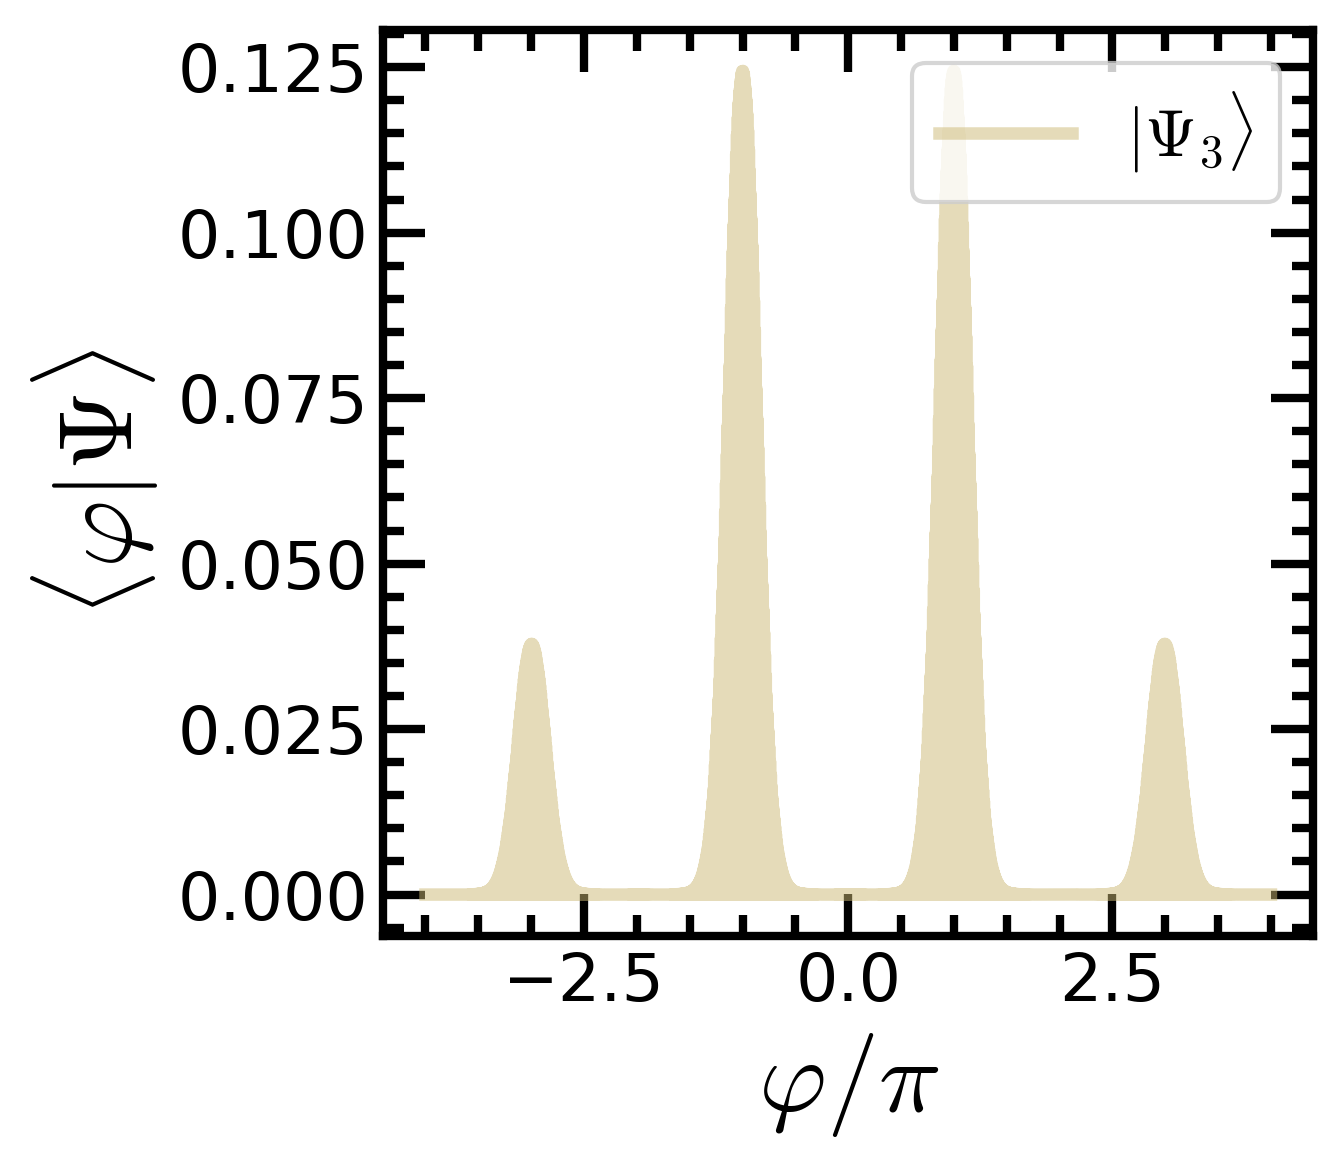

In [42]:
plt.figure(figsize = [4,4])
# plt.plot(phi_pts/np.pi, abs(np.real(states_GKP[0])), alpha = 0.5, label = r'$|\Psi_0\rangle$')
# plt.plot(phi_pts/np.pi, abs(np.real(states_GKP[1])), color = 'C1', alpha = 0.5, label = r'$|\Psi_1\rangle$')
# plt.plot(phi_pts/np.pi, abs(np.real(states_GKP[2])), color = 'C2', alpha = 0.5, label = r'$|\Psi_2\rangle$')
plt.plot(phi_pts/np.pi, abs(np.real(states_GKP[3])), color = 'C4', alpha = 0.5, label = r'$|\Psi_3\rangle$')
plt.xlabel(r'$\varphi/\pi$')
plt.ylabel(r'$\langle \varphi | \Psi \rangle$')
plt.legend(loc=1)

In [352]:
E_C = 0.0
E_J2 = 15
E_J1 = 1
E_L = 0.00
E_S = 5
energies, states_GKP = GKP_hamiltonian(E_C,E_L,E_J1,E_J2,E_S).eigenstates()

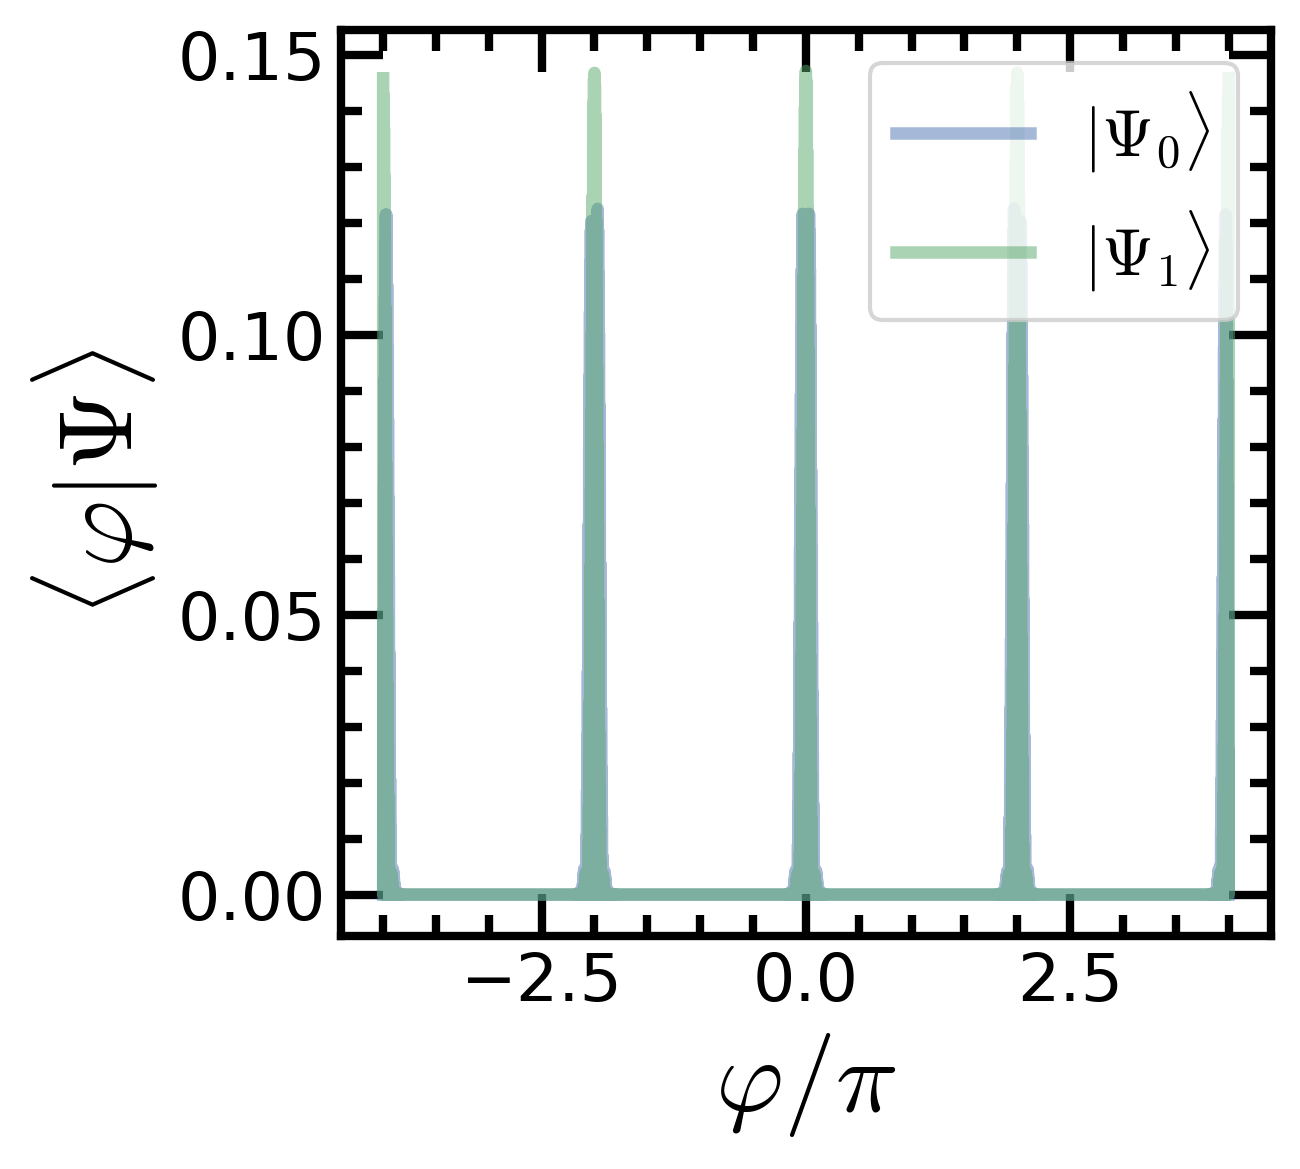

In [355]:
plt.figure(figsize = [4,4])
plt.plot(phi_pts/np.pi, abs(np.real(states_GKP[1])), alpha = 0.5, label = r'$|\Psi_0\rangle$')
plt.plot(phi_pts/np.pi, abs(np.real(states_GKP[0])), color = 'C1', alpha = 0.5, label = r'$|\Psi_1\rangle$')
plt.xlabel(r'$\varphi/\pi$')
plt.ylabel(r'$\langle \varphi | \Psi \rangle$')
plt.legend(loc=1)

## Harmonic oscillator basis

In [111]:
E_c = 0.2
E_l = 0.05
E_j2 = 0
E_j1 = 10
E_s = 4
p_e = 0.5*np.pi
N = 100

a = tensor(destroy(N))
p = (a+a.dag())*(8.0*E_c/E_l)**(0.25)/np.sqrt(2.0)
na = 1.0j*(a.dag()-a)*(E_l/(8*E_c))**(0.25)/np.sqrt(2.0)
phi1 = p+p_e
phi2 = 2*(p+p_e)
H = 4*E_c*na**2 + 0.5*E_l*p**2  -E_j1*phi1.cosm() - E_j2*phi2.cosm() - E_s*(2*np.pi*na).cosm()
energies,estates = H.eigenstates()

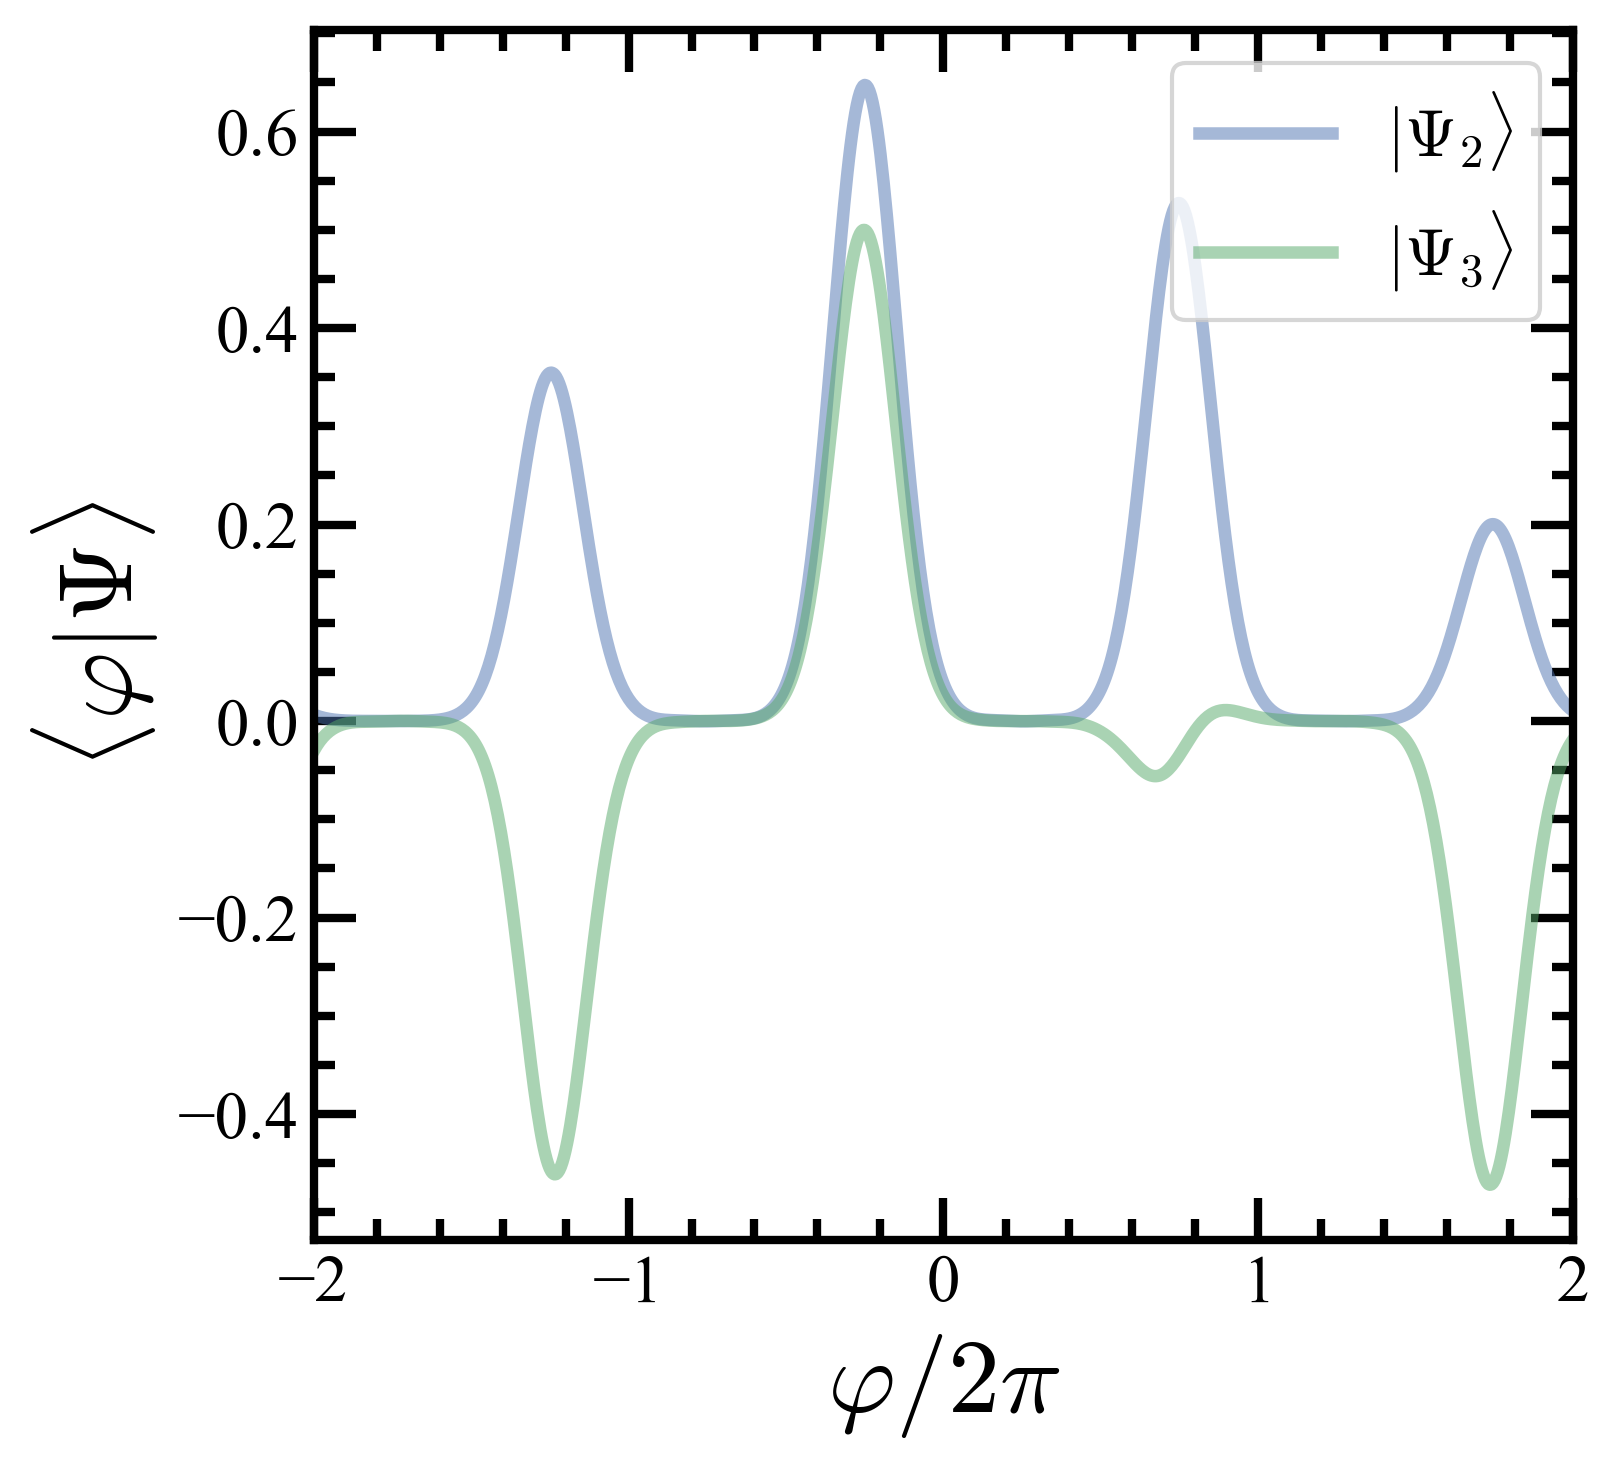

In [116]:
from scipy.special import eval_hermite as hpoly

def ho_wf(phi,l,Ec,El):
    ratio = (8.0*Ec/El)**(0.25)
    coeff = (2.0**l*np.math.factorial(l)*np.sqrt(np.pi)*ratio)**(-0.5)
    return coeff * np.exp(-0.5*(phi/ratio)**2) * hpoly(l,phi/ratio)

toPlotNum = 5
phi = np.linspace(-4,4,801)*np.pi
waveFunction = np.zeros((len(phi), toPlotNum))
for state_idx in range(toPlotNum):
        wFunc_temp = np.zeros(len(phi))
        for lvl_idx in range(N):
            coeff = np.real(estates[state_idx].full()[lvl_idx, 0])
            wFunc_temp = wFunc_temp + coeff*ho_wf(phi, lvl_idx, E_c, E_l)
        waveFunction[:,state_idx] = wFunc_temp
        
        
plt.figure(figsize = [5.5,5])
plt.plot(phi/np.pi/2, (np.real(waveFunction[:,0])),color = 'C0', alpha = 0.5, label = r'$|\Psi_2\rangle$')
plt.plot(phi/np.pi/2, (np.real(waveFunction[:,3])), color = 'C1', alpha = 0.5, label = r'$|\Psi_3\rangle$')
plt.xlabel(r'$\varphi/2\pi$')
plt.ylabel(r'$\langle \varphi | \Psi \rangle$')
plt.legend(loc=1)
plt.xlim([phi[0]/np.pi/2,phi[-1]/np.pi/2])
# plt.ylim([0,0.9])
plt.tight_layout()
# if savefig == True:
#     figname = 'GKP_practical.pdf'
#     plt.savefig(figpath+figname)

In [ ]:
plt.figure(figsize = [4,4])
plt.plot(phi_pts/np.pi, abs(np.real(states_GKP[1])), alpha = 0.5, label = r'$|\Psi_0\rangle$')
plt.plot(phi_pts/np.pi, abs(np.real(states_GKP[0])), color = 'C1', alpha = 0.5, label = r'$|\Psi_1\rangle$')
plt.xlabel(r'$\varphi/\pi$')
plt.ylabel(r'$\langle \varphi | \Psi \rangle$')
plt.legend(loc=1)

In [125]:
Nx = 2000
xpts = np.linspace(-10,10,Nx+1)*np.pi
x=np.diag(xpts)
op_x = Qobj(2*np.sqrt(np.pi)*x)
dx = xpts[-1]-xpts[-2]
dx_coeff = -1.0j/(2.0*dx)
p = dx_coeff*(np.diag(np.ones(Nx), 1) - np.diag(np.ones(Nx), -1))
cosp=diags([np.cos(dx_coeff),np.cos(dx_coeff)], [-1,1], shape=(Nx+1,Nx+1), format='csr', dtype='complex128')
op_p = Qobj(2*np.sqrt(np.pi)*p)
def LLL_hamiltonian(w,Vx,Vp):
    return Qobj(np.diag(np.cos(xpts))+np.diag(np.ones(Nx), 1) + np.diag(np.ones(Nx), -1))

In [126]:
w = 0.0
Vx = 1
Vp = 1
energies, states_GKP = LLL_hamiltonian(w,Vx,Vp).eigenstates()

For eigenstate, the X matrix element is  13.328513374638321


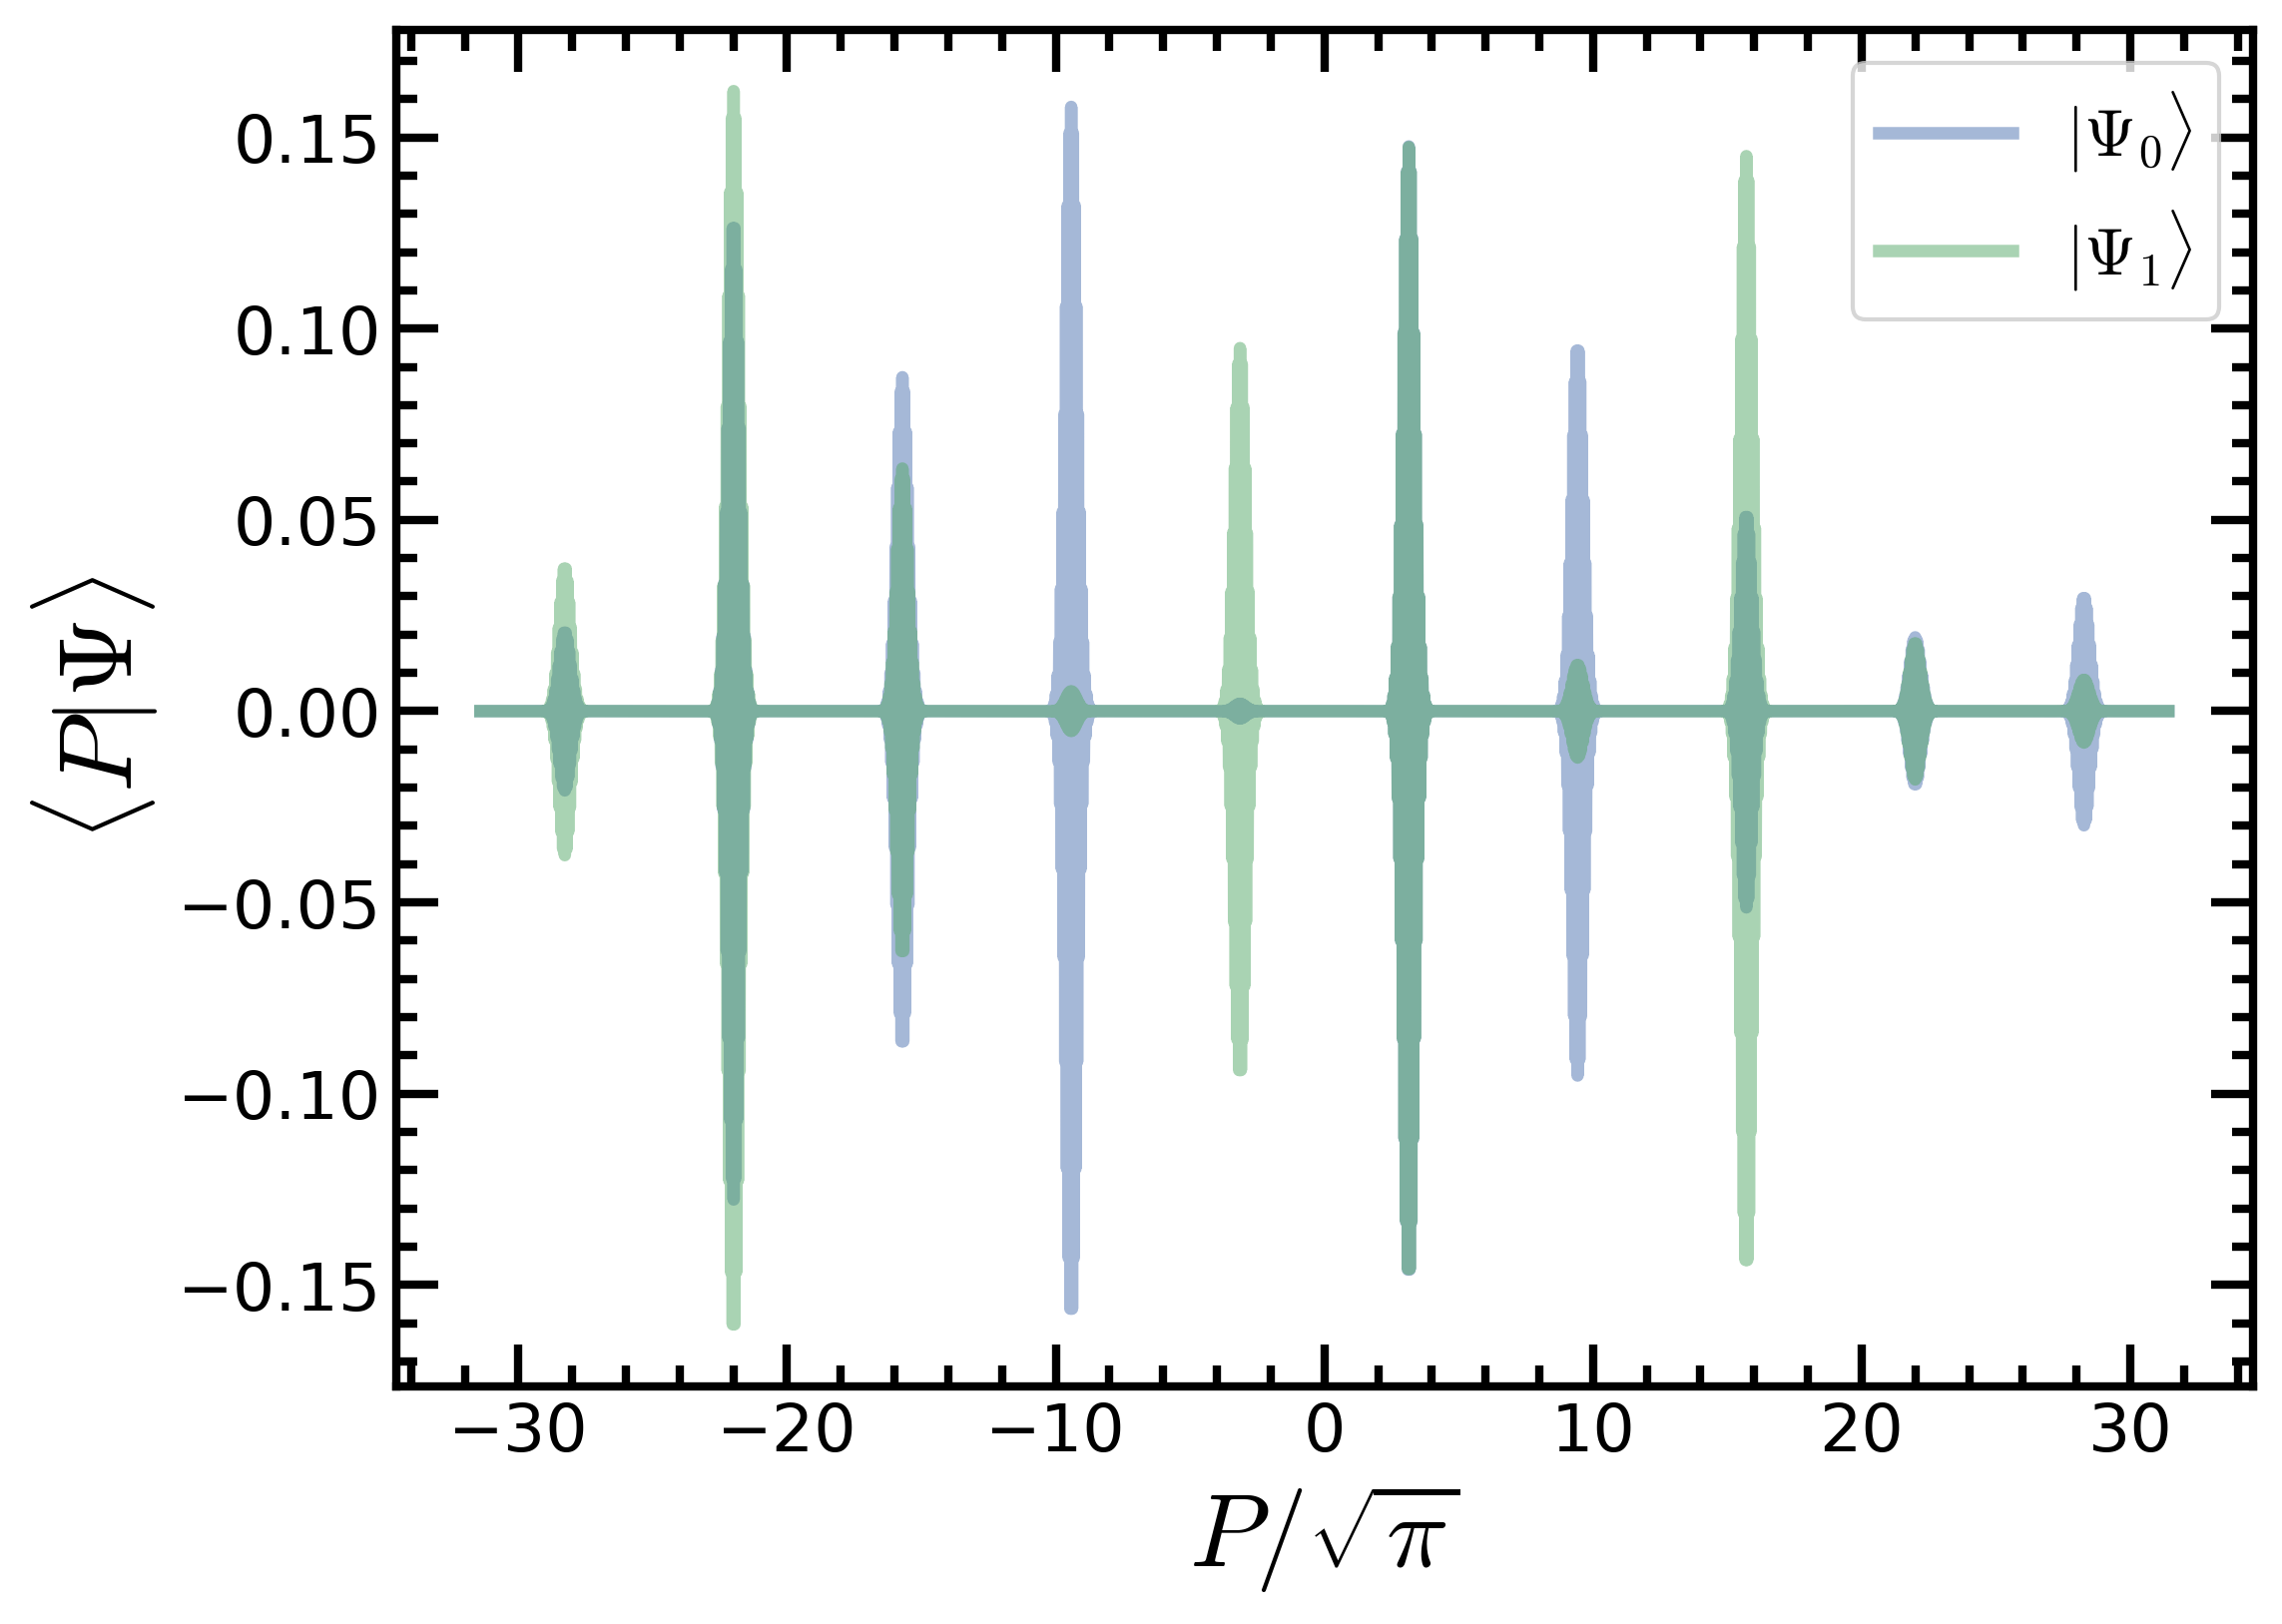

In [127]:
plt.figure(figsize = [8,6])
plt.plot(xpts, (np.real(states_GKP[0])), alpha = 0.5, label = r'$|\Psi_0\rangle$')
plt.plot(xpts, (np.real(states_GKP[1])), color = 'C1', alpha = 0.5, label = r'$|\Psi_1\rangle$')
plt.xlabel(r'$P/\sqrt{\pi}$')
plt.ylabel(r'$\langle P | \Psi \rangle$')
plt.legend()

x_me = op_x.matrix_element(states_GKP[0],states_GKP[1])
print("For eigenstate, the X matrix element is ", str(abs(x_me)))

In [359]:
gamma = 1e3
tau = 1/(gamma*2*np.pi)
print (tau*1e3)

0.15915494309189535
